# Data Wrangling , Analysis and Exploration of - 
## How the Honey Production affected the other US Grains Production.

In [123]:
### This code includes:
# - Data Wrangling for Category - 3 - Grains, Oats and Meal.
# - Correlation Matrices and finding Highly Correlated Commodities vs Time and Honey.
# - Linear regression among the highle correlated Commodities .
# - Different visualisations.

## Load Packages

In [124]:
# Installing Package

install.packages("ggpubr")



The downloaded binary packages are in
	/var/folders/w0/t7zkm9d12h11l_wy7wwcclsm0000gn/T//Rtmpi1yJD0/downloaded_packages


In [125]:
# Load Libraries

library(readr)
library(dplyr)
library(ggplot2)
library(stringr)  
library(corrplot)
library(rcompanion) # check for the assumption of normality
library(car)        # correct for a violation of homogeneity of variance
library(ggpubr)     # to use ggscatter



In [142]:
# Set the figure size.
knitr::opts_chunk$set(fig.width=20, fig.height=10, fig.align = "center") 

## Load Data

In [126]:
# Read data 

usdaHoney2 <- read_csv("../Data/usdaHoney2.csv")

New names:
* `` -> ...1

Rows: 8313 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Commodity_Description, Country_Code, Country_Name, Attribute_Descri...
dbl (4): ...1, Year, Value, Category


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [127]:
# Pick only the Categories Needed for Analysis
# Category 3 - Grains, Oats and Meal.
# Category 6 - Honey

USDA_Commodities <- filter(usdaHoney2, Category == 3 | Category == 6)

head(USDA_Commodities)

...1,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Category
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
59,Barley,US,United States,1998,Production,(1000 MT),7655,3
60,Barley,US,United States,1999,Production,(1000 MT),5922,3
61,Barley,US,United States,2000,Production,(1000 MT),6919,3
62,Barley,US,United States,2001,Production,(1000 MT),5407,3
63,Barley,US,United States,2002,Production,(1000 MT),4940,3
64,Barley,US,United States,2003,Production,(1000 MT),6059,3


In [128]:
# View Commodities and Unit of Measurements

unique(USDA_Commodities$Unit_Description)
unique(USDA_Commodities$Commodity_Description)

[1] "(1000 MT)" "MT"

[1] "Barley"              "Meal, Cottonseed"    "Meal, Fish"         
 [4] "Meal, Peanut"        "Meal, Rapeseed"      "Meal, Soybean"      
 [7] "Meal, Sunflowerseed" "Oats"                "Rice, Milled"       
[10] "Rye"                 "Sorghum"             "Wheat"              
[13] "Honey"

In [129]:
# Creating/ Renaming the dataset.

USDA_Commodities_MT <- USDA_Commodities 

## Data Wrangling



In [130]:
# Drop null values

USDA_Commodities_MT <- na.omit(USDA_Commodities_MT)

In [131]:
# Convert the 1000 MT to Tons

USDA_Commodities_MT$Value[USDA_Commodities_MT$Unit_Description == '(1000 MT)'] <- USDA_Commodities_MT$Value * 1000
USDA_Commodities_MT$Unit_Description[USDA_Commodities_MT$Unit_Description == '(1000 MT)'] <- '(MT)'

head(USDA_Commodities_MT)

Warning message in USDA_Commodities_MT$Value[USDA_Commodities_MT$Unit_Description == :
“number of items to replace is not a multiple of replacement length”


...1,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Category
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
59,Barley,US,United States,1998,Production,(MT),7655000,3
60,Barley,US,United States,1999,Production,(MT),5922000,3
61,Barley,US,United States,2000,Production,(MT),6919000,3
62,Barley,US,United States,2001,Production,(MT),5407000,3
63,Barley,US,United States,2002,Production,(MT),4940000,3
64,Barley,US,United States,2003,Production,(MT),6059000,3


In [132]:
# Remove the Commodity_Description having Meal since it's not a crop; it's just a byproduct.

USDA_Commodities_DS <- USDA_Commodities_MT[!(str_detect(USDA_Commodities_MT$Commodity_Description, "Meal")), ] 

unique(USDA_Commodities_DS$Commodity_Description)

[1] "Barley"       "Oats"         "Rice, Milled" "Rye"          "Sorghum"     
[6] "Wheat"        "Honey"

In [133]:
# Picking the maximum Value for each commodity and Year pair since there seems to be many duplicate entries.

Grouped_Honey_DS3 = USDA_Commodities_DS %>% group_by(Commodity_Description, Year) %>% 
  summarise(Value = max(Value), Country_Code = "US", Country_Name = "United States",
            Attribute_Description = "Production", Unit_Description = "(MT)",
            .groups = 'drop')

View(Grouped_Honey_DS3)

Commodity_Description,Year,Value,Country_Code,Country_Name,Attribute_Description,Unit_Description
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Barley,1998,7655000.00,US,United States,Production,(MT)
Barley,1999,5922000.00,US,United States,Production,(MT)
Barley,2000,6919000.00,US,United States,Production,(MT)
Barley,2001,5407000.00,US,United States,Production,(MT)
Barley,2002,4940000.00,US,United States,Production,(MT)
Barley,2003,6059000.00,US,United States,Production,(MT)
Barley,2004,6091000.00,US,United States,Production,(MT)
Barley,2005,4613000.00,US,United States,Production,(MT)
Barley,2006,3984000.00,US,United States,Production,(MT)


In [134]:
# Saving the wrangled and final dataset for Commodity group 3

write.csv(Grouped_Honey_DS3, "/Users/nehag/Desktop/Final Project/Data/Grouped_Honey_DS3.csv")

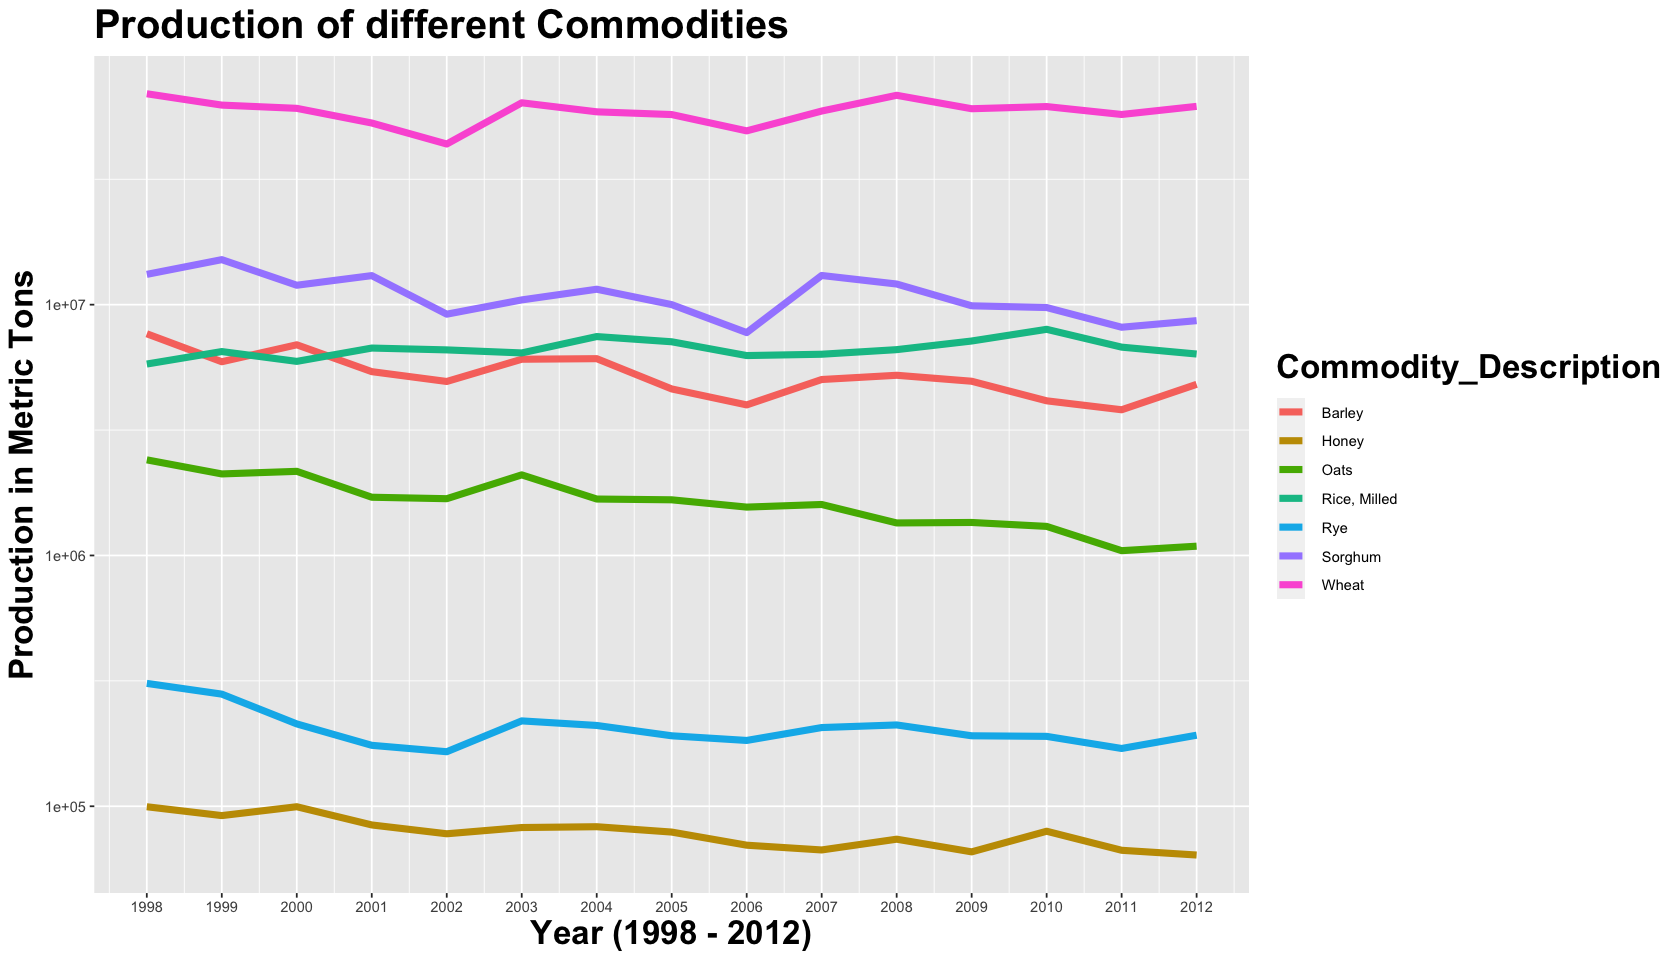

In [143]:
# Line graph for all the commodities Production vs Years


ggplot(Grouped_Honey_DS3) + 
  geom_line(aes(x = Year, y = Value, color = Commodity_Description), lwd = 2) +
  scale_x_continuous(breaks = 1998:2012) +
  scale_y_log10() +
  labs(x = "Year (1998 - 2012)", y = "Production in Metric Tons", title = "Production of different Commodities") +
  theme(title = element_text(size= 20, face="bold")) 


In [144]:
# Filtering and Looking at production for each commodity - Barley

USDA_Barley <- Grouped_Honey_DS3 %>%
  filter(Commodity_Description == "Barley") %>%
  arrange(desc(Value))

View(USDA_Barley)

Commodity_Description,Year,Value,Country_Code,Country_Name,Attribute_Description,Unit_Description
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Barley,1998,7655000,US,United States,Production,(MT)
Barley,2000,6919000,US,United States,Production,(MT)
Barley,2004,6091000,US,United States,Production,(MT)
Barley,2003,6059000,US,United States,Production,(MT)
Barley,1999,5922000,US,United States,Production,(MT)
Barley,2001,5407000,US,United States,Production,(MT)
Barley,2008,5230000,US,United States,Production,(MT)
Barley,2007,5030000,US,United States,Production,(MT)
Barley,2009,4951000,US,United States,Production,(MT)


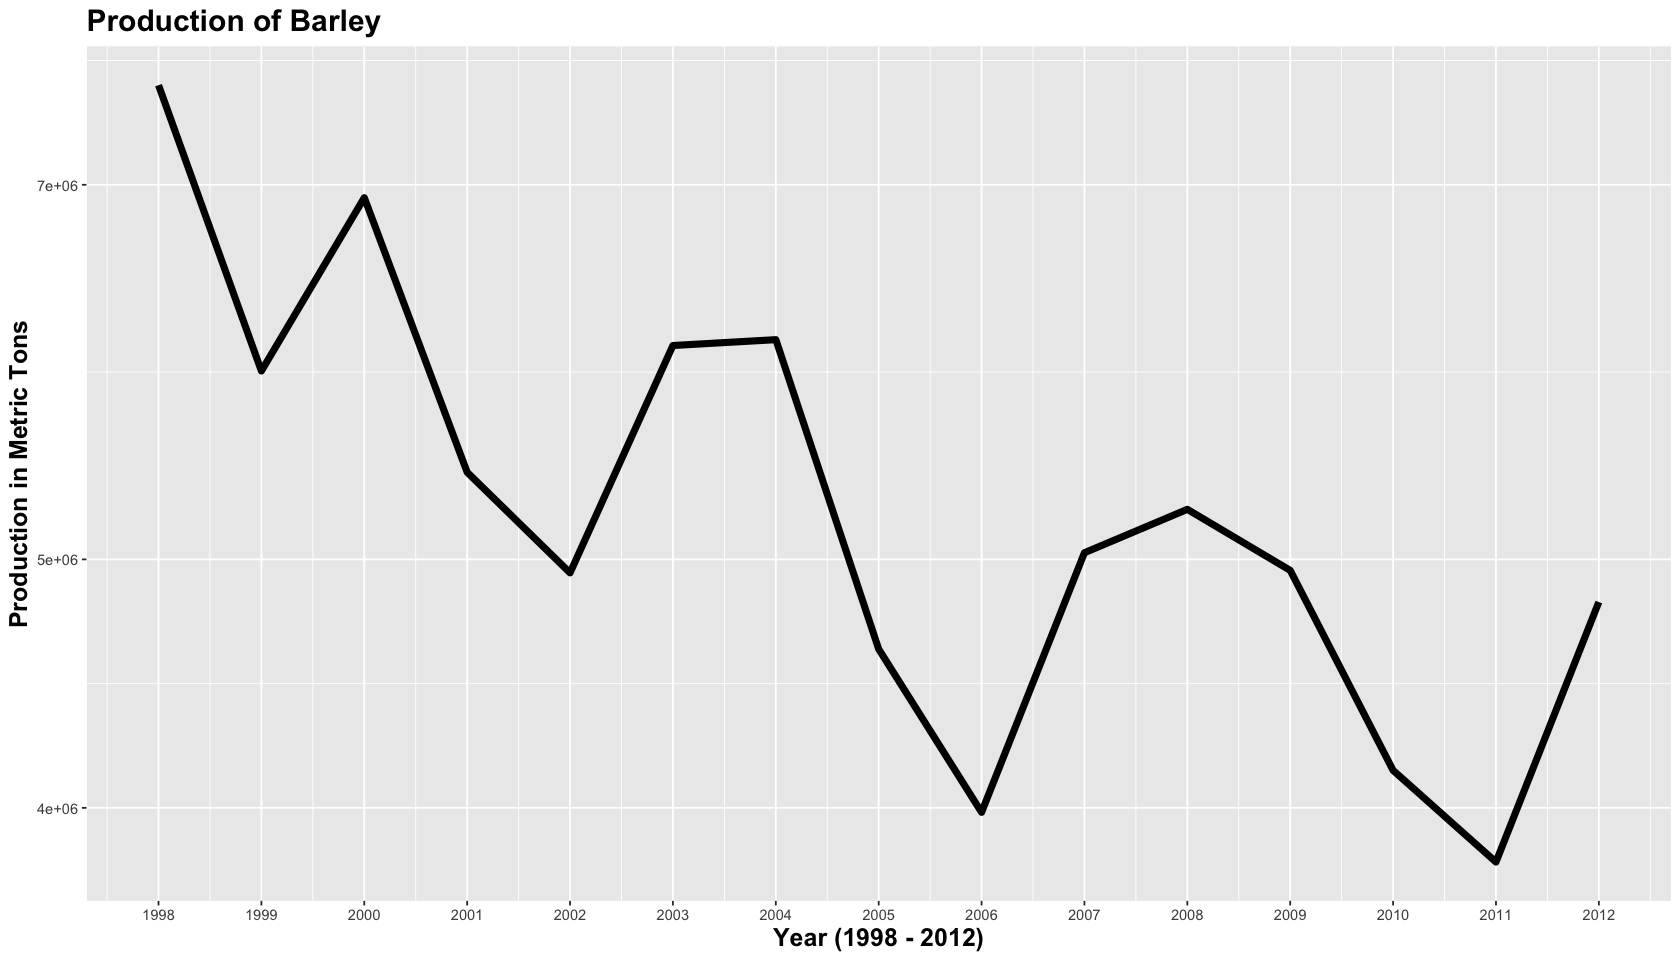

In [145]:
# Line graph for Barley

ggplot(USDA_Barley) + 
  geom_line(aes(x = Year, y = Value), lwd = 2) +
  scale_x_continuous(breaks = 1998:2012) +
  scale_y_log10()+
  labs(x = "Year (1998 - 2012)", y = "Production in Metric Tons", title = "Production of Barley") +
  theme(title = element_text(size= 15, face="bold"))

In [146]:
# Filtering and Looking at production for each commodity - Wheat

USDA_Wheat <- Grouped_Honey_DS3 %>%
  filter(Commodity_Description == "Wheat") %>%
  arrange(desc(Value))

View(USDA_Wheat)

Commodity_Description,Year,Value,Country_Code,Country_Name,Attribute_Description,Unit_Description
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Wheat,1998,69327000,US,United States,Production,(MT)
Wheat,2008,68363000,US,United States,Production,(MT)
Wheat,2003,63814000,US,United States,Production,(MT)
Wheat,1999,62475000,US,United States,Production,(MT)
Wheat,2012,61755000,US,United States,Production,(MT)
Wheat,2010,61641000,US,United States,Production,(MT)
Wheat,2000,60641000,US,United States,Production,(MT)
Wheat,2009,60423000,US,United States,Production,(MT)
Wheat,2007,59156000,US,United States,Production,(MT)


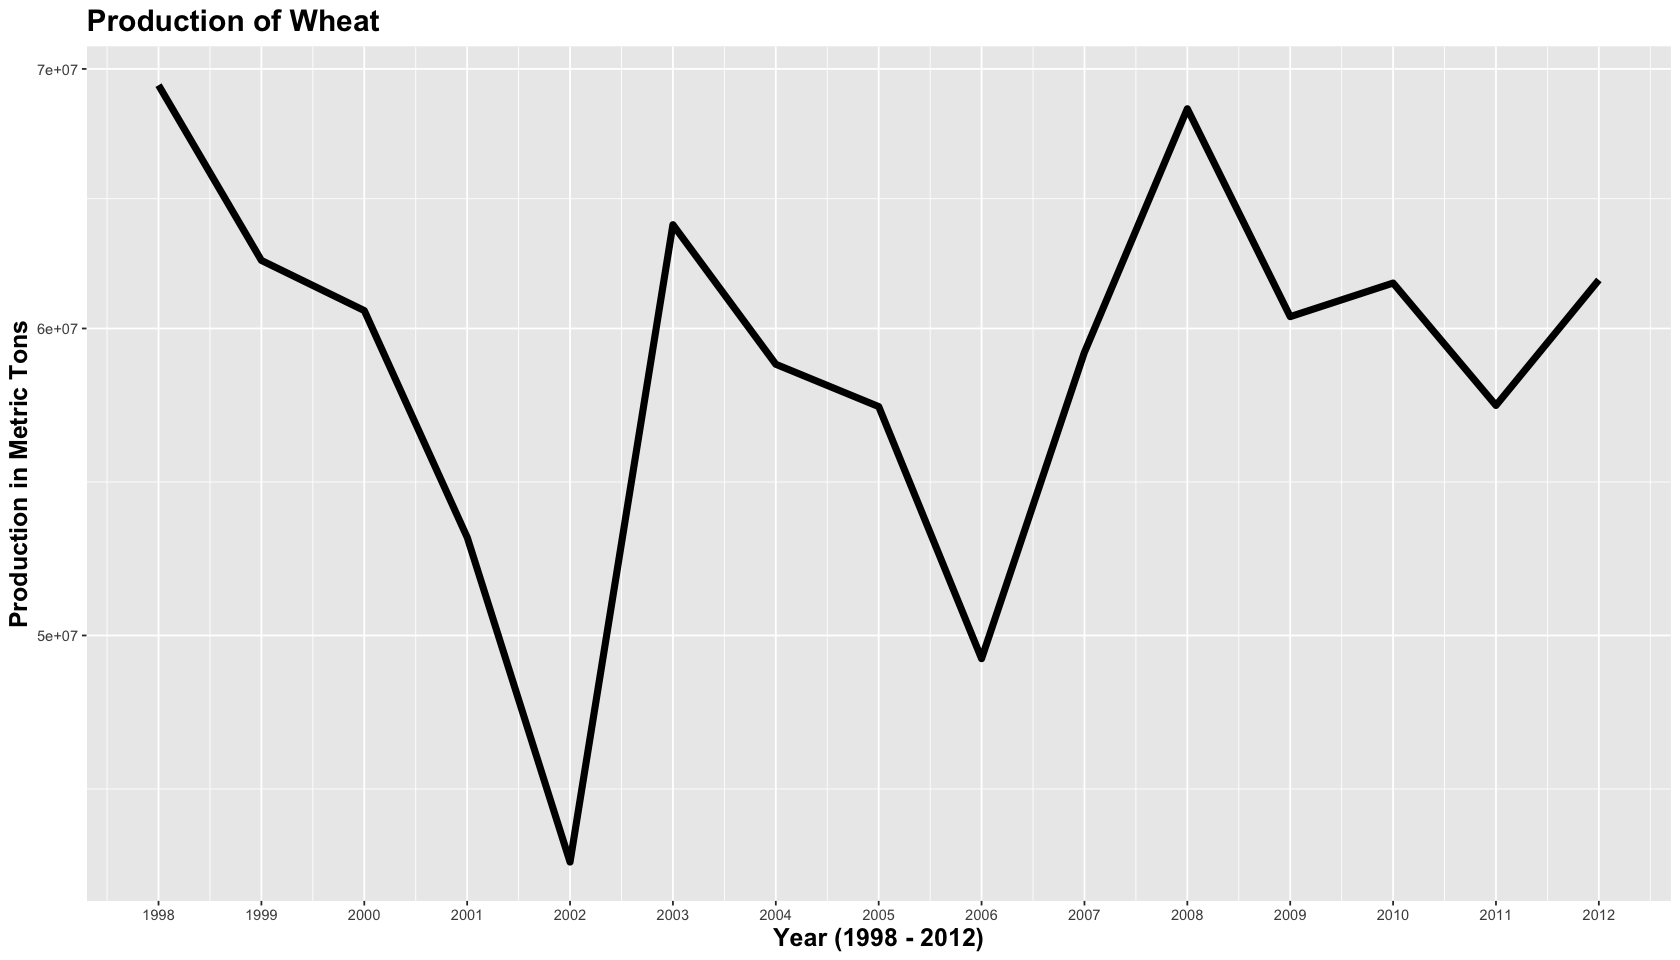

In [147]:
# Line graph for Wheat

ggplot(USDA_Wheat) + 
  geom_line(aes(x = Year, y = Value), lwd = 2) +
  scale_x_continuous(breaks = 1998:2012) +
  scale_y_log10()+
  labs(x = "Year (1998 - 2012)", y = "Production in Metric Tons", title = "Production of Wheat") +
  theme(title = element_text(size= 15, face="bold"))

In [148]:
# Filtering and Looking at production for each - Barley and Honey and wheat

USDA_BarleyHoneyWheat <- Grouped_Honey_DS3 %>%
  filter(Commodity_Description == "Barley" | Commodity_Description == "Wheat" | Commodity_Description == "Honey") %>%
  arrange(desc(Value))

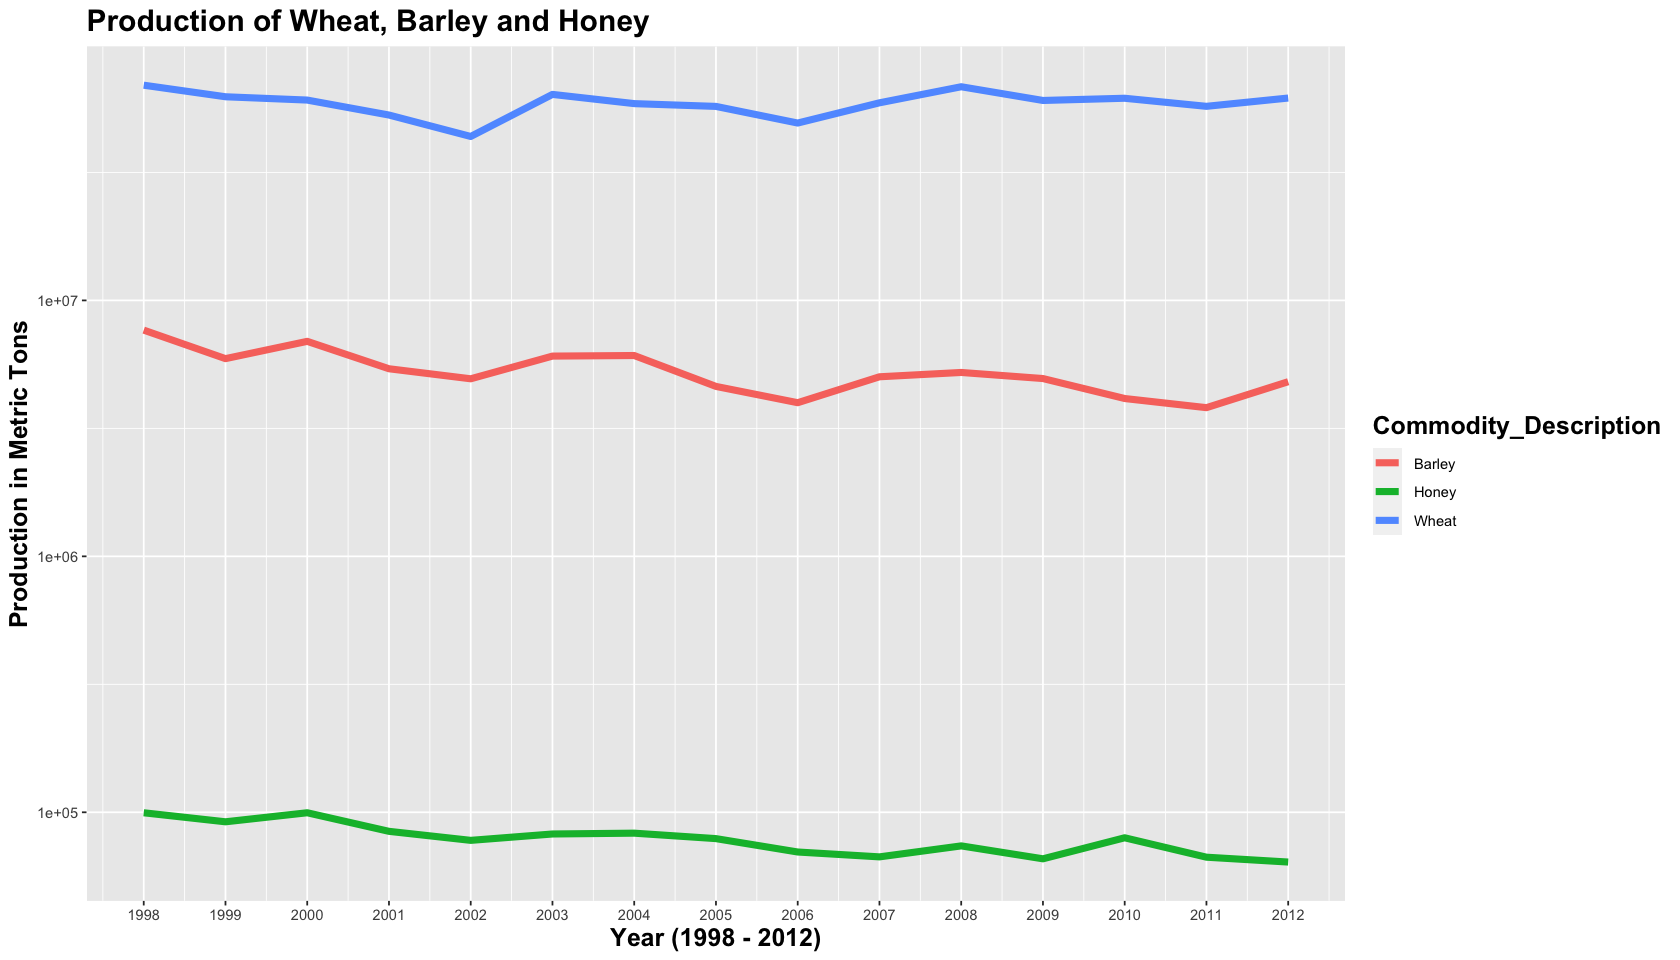

In [149]:
# Line plot for Barley Honey Wheat

ggplot(USDA_BarleyHoneyWheat) + 
  geom_line(aes(x = Year, y = Value, color = Commodity_Description), lwd = 2) +
  scale_x_continuous(breaks = 1998:2012) +
  scale_y_log10()+
  labs(x = "Year (1998 - 2012)", y = "Production in Metric Tons", title = "Production of Wheat, Barley and Honey") +
  theme(title = element_text(size= 15, face="bold"))

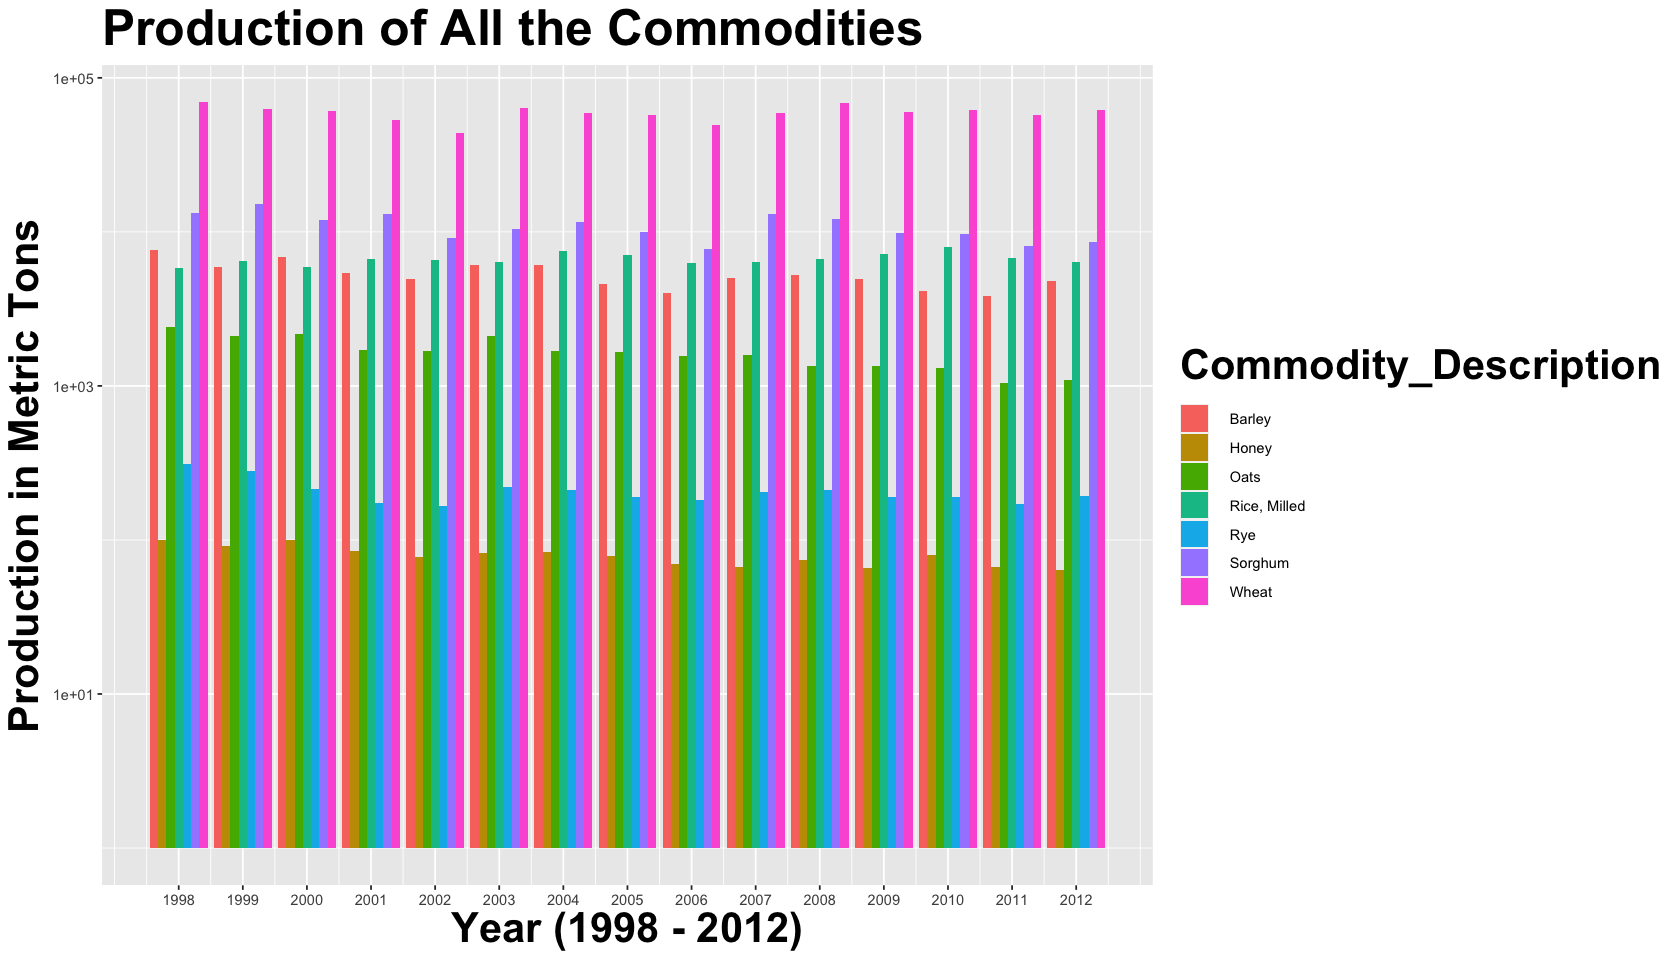

In [150]:
# Bar Plot for all the commodities

ggplot(data = Grouped_Honey_DS3, aes(x = Year, y = Value/ 1000, fill = Commodity_Description)) +
  geom_bar(stat = "identity", position = position_dodge(), alpha = 1)+
  scale_x_continuous(breaks = 1998:2012)+
  scale_y_log10()+
  labs(x = "Year (1998 - 2012)", y = "Production in Metric Tons", title = "Production of All the Commodities") +
  theme(title = element_text(size= 25, face="bold"))

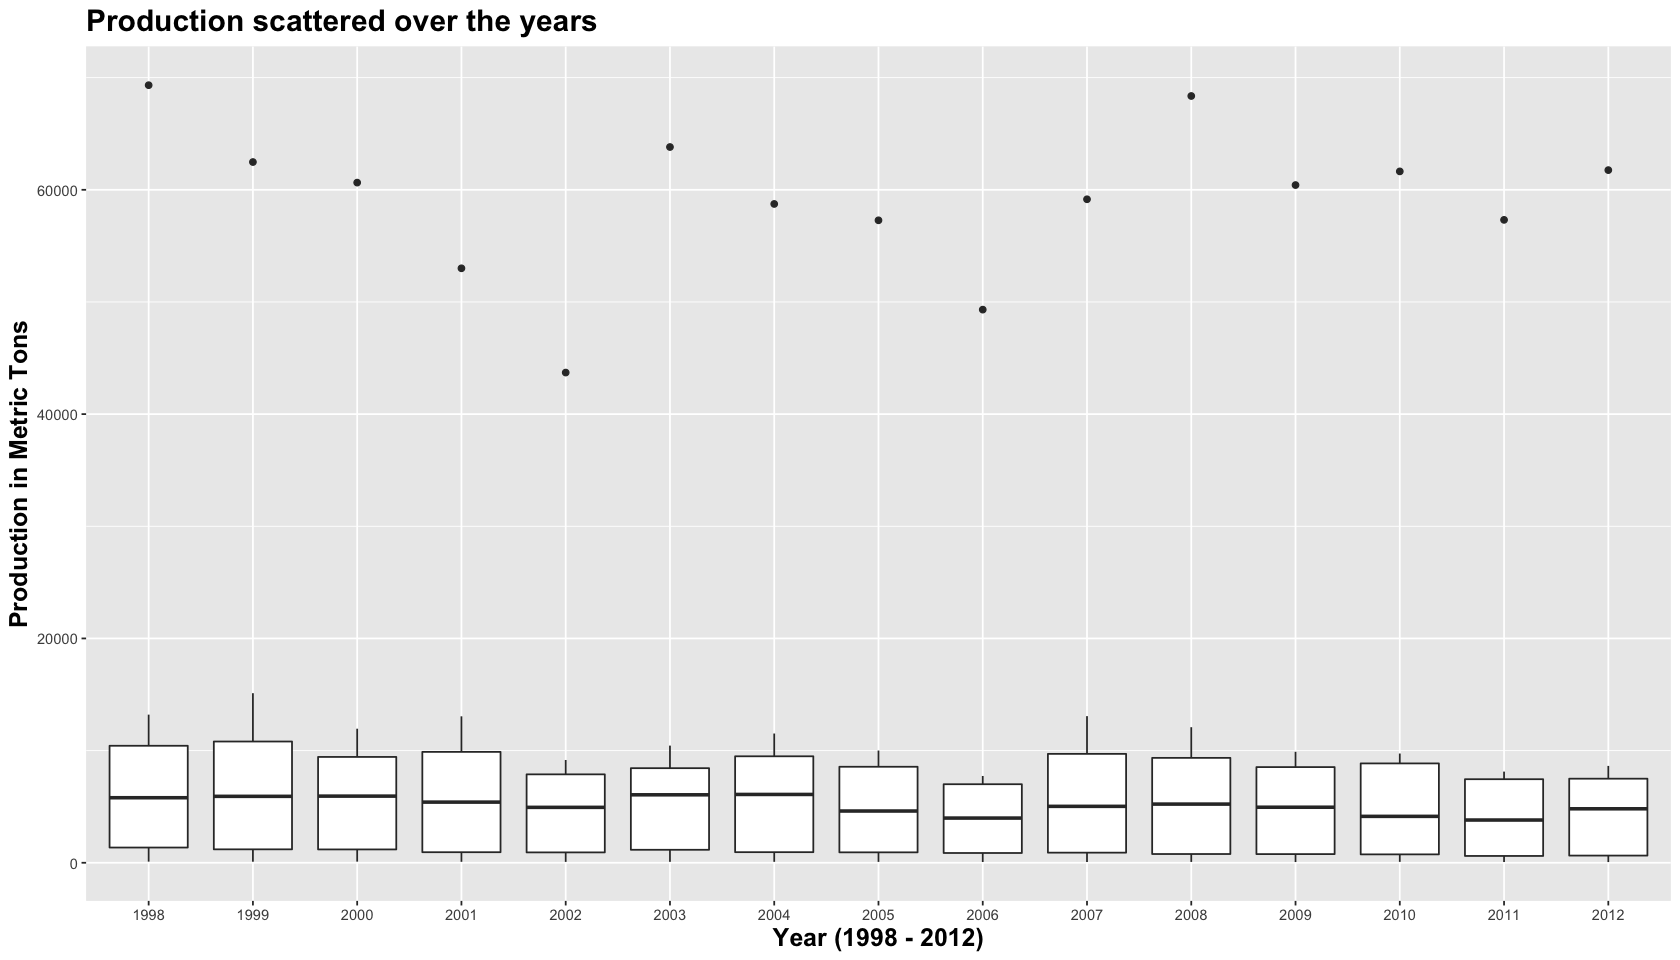

In [151]:
# Box Plot for the production over the years

ggplot(Grouped_Honey_DS3, aes(x = factor(Year), y = Value/ 1000)) + geom_boxplot()+
labs(x = "Year (1998 - 2012)", y = "Production in Metric Tons", title = "Production scattered over the years") +
  theme(title = element_text(size= 15, face="bold"))

## TRANSPOSE the data --Putting the Commodity as Columns and their Values corresponding to the year.



In [152]:
# New dataset to test how it works

TransposeDS <- Grouped_Honey_DS3

colnames(TransposeDS)

[1] "Commodity_Description" "Year"                  "Value"                
[4] "Country_Code"          "Country_Name"          "Attribute_Description"
[7] "Unit_Description"

In [153]:
# Picking the Year
FinalDSYear <- TransposeDS[, c('Year')]

In [154]:
# Picking only the years from 1998-2012
FinalDSYear98to12 <- FinalDSYear[1:15, ]

In [155]:
# Making a subset of just Commodity and Value
FinalDSNY <- TransposeDS[, c('Commodity_Description', 'Value')]

### Adding Barley

In [156]:
# Adding Barley
DSBarley <- subset(FinalDSNY, Commodity_Description == "Barley")

# Changing the colname to BarleyValue

colnames(DSBarley)[2] <- 'BarleyValue'

# Creating a new column 
FinalDSYear98to12$BarleyValue <- NA

DSBarley <- as.data.frame(DSBarley)

# Assigning values 
FinalDSYear98to12$BarleyValue <- DSBarley$BarleyValue

### Adding Honey

In [157]:
# Adding Honey
DSHoney <- subset(FinalDSNY, Commodity_Description == "Honey")

# Changing the colname to HoneyValue
colnames(DSHoney)[2] <- 'HoneyValue'

# Creating a new column 
FinalDSYear98to12$HoneyValue <- NA

DSHoney <- as.data.frame(DSHoney)

# Assigning values 
FinalDSYear98to12$HoneyValue <- DSHoney$HoneyValue

### Adding Oats



In [158]:
# Adding Oats
DSOats <- subset(FinalDSNY, Commodity_Description == "Oats")

# Changing the colname to OatsValue

colnames(DSOats)[2] <- 'OatsValue'

# Creating a new column 
FinalDSYear98to12$OatsValue <- NA

DSOats <- as.data.frame(DSOats)

# Assigning values 
FinalDSYear98to12$OatsValue <- DSOats$OatsValue

### Adding Rice, Milled

In [159]:
# Rice, Milled
DSRice <- subset(FinalDSNY, Commodity_Description == "Rice, Milled")

# Changing the colname to RiceValue
colnames(DSRice)[2] <- 'RiceValue'

# Creating a new column 
FinalDSYear98to12$RiceValue <- NA

DSRice <- as.data.frame(DSRice)

# Assigning values 
FinalDSYear98to12$RiceValue <- DSRice$RiceValue



### Adding Rye



In [160]:
# Adding Rye
DSRye <- subset(FinalDSNY, Commodity_Description == "Rye")

# Changing the colname to RyeValue
colnames(DSRye)[2] <- 'RyeValue'

# Creating a new column 
FinalDSYear98to12$RyeValue <- NA

DSRye <- as.data.frame(DSRye)

# Assigning values 
FinalDSYear98to12$RyeValue <- DSRye$RyeValue

### Adding Sorghum

In [161]:
# Adding Sorghum

DSSorghum <- subset(FinalDSNY, Commodity_Description == "Sorghum")

# Changing the colname to SorghumValue

colnames(DSSorghum)[2] <- 'SorghumValue'

# Creating a new column 

FinalDSYear98to12$SorghumValue <- NA
DSSorghum <- as.data.frame(DSSorghum)

# Assigning values 

FinalDSYear98to12$SorghumValue <- DSSorghum$SorghumValue

### Adding Wheat

In [162]:
# Adding Wheat
DSWheat <- subset(FinalDSNY, Commodity_Description == "Wheat")

# Changing the colname to WheatValue

colnames(DSWheat)[2] <- 'WheatValue'

# Creating a new column 
FinalDSYear98to12$WheatValue <- NA

DSWheat <- as.data.frame(DSWheat)

# Assigning values 
FinalDSYear98to12$WheatValue <- DSWheat$WheatValue



In [163]:
# View the Final Table

View(FinalDSYear98to12)  

Year,BarleyValue,HoneyValue,OatsValue,RiceValue,RyeValue,SorghumValue,WheatValue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1998,7655000,99571.62,2406000,5798000,309000,13207000,69327000
1999,5922000,91800.72,2114000,6502000,280000,15118000,62475000
2000,6919000,99589.31,2165000,5941000,213000,11952000,60641000
2001,5407000,84253.44,1707000,6714000,175000,13057000,53001000
2002,4940000,77684.09,1684000,6602000,165000,9163000,43705000
2003,6059000,82268.53,2096000,6420000,219000,10446000,63814000
2004,6091000,82884.05,1679000,7462000,210000,11523000,58738000
2005,4613000,78910.60,1667000,7113000,191000,10005000,57280000
2006,3984000,69960.81,1559000,6267000,183000,7738000,49316000


In [164]:
# Write the CSV file for Visualisation Purposes

write.csv(FinalDSYear98to12, "/Users/nehag/Desktop/Final Project/Data/GrainsYear98to12_DS.csv")

In [165]:
# Correlation Matrix for all the commodities

corMatGrains <- cor(FinalDSYear98to12)
round(corMatGrains, 2)

,Year,BarleyValue,HoneyValue,OatsValue,RiceValue,RyeValue,SorghumValue,WheatValue
Year,1.00,-0.77,-0.87,-0.94,0.45,-0.59,-0.65,0.01
BarleyValue,-0.77,1.00,0.82,0.84,-0.50,0.76,0.68,0.48
HoneyValue,-0.87,0.82,1.00,0.87,-0.29,0.66,0.62,0.27
OatsValue,-0.94,0.84,0.87,1.00,-0.50,0.72,0.63,0.21
RiceValue,0.45,-0.50,-0.29,-0.50,1.00,-0.42,-0.24,-0.11
RyeValue,-0.59,0.76,0.66,0.72,-0.42,1.00,0.69,0.67
SorghumValue,-0.65,0.68,0.62,0.63,-0.24,0.69,1.00,0.45
WheatValue,0.01,0.48,0.27,0.21,-0.11,0.67,0.45,1.00


In [166]:
# We can see Honey and Oats are strongly negatively correlated with time.
# Barley is strongly correlated with honey and oats and somewhat correlated with Rye and negatively with time.
# Honey is strongly correlated with Barley and Oats.
# Oats somewhat correlated with Rye.
# There 's no significant correlation among other Commodities.

### Visualizing Matrix

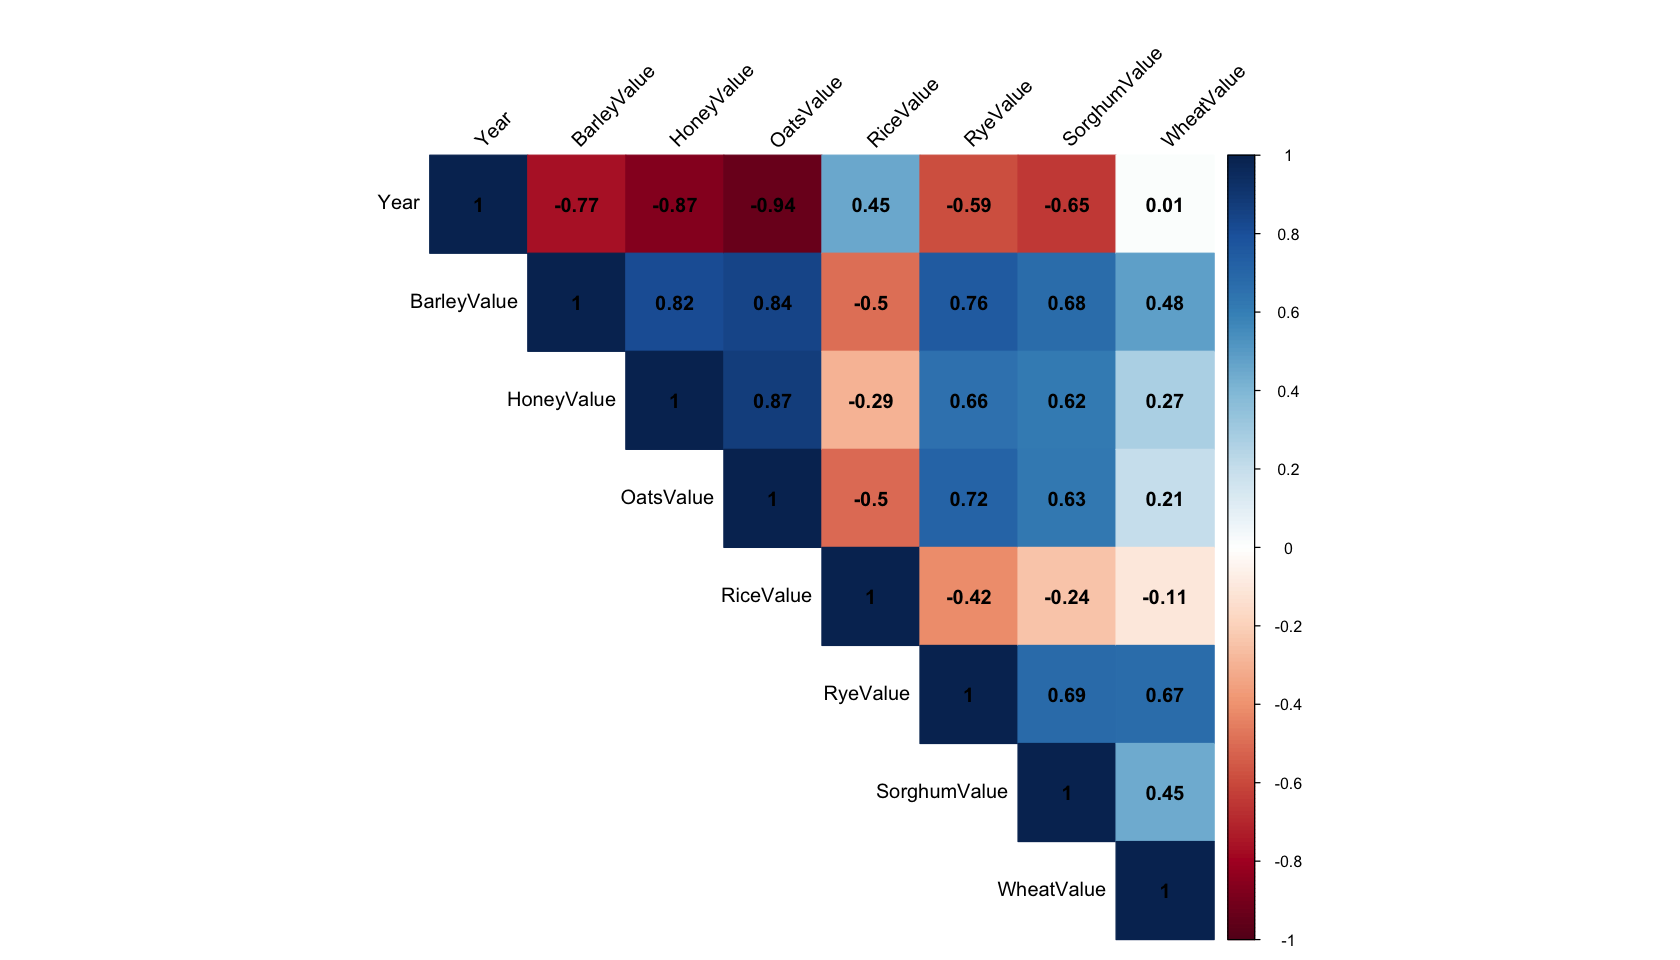

In [167]:
## Visualizing Matrix

corrplot(corMatGrains, type="upper", method="color", addCoef.col = "black", tl.col="black", tl.srt = 45)

In [168]:
## Looks like, Honey production plays a large influence in the pollenization of Barley, Oats and Rye (corr val >= .65!

## Let's see the relationships between Year, Barley, Honey, Rye and Oats.
## ------------------------------------------------------------------------------------

#### Running Linear Regressions on Highly Correlated Commodity - Barley 



In [169]:
# Running Linear Regressions on Highly Correlated Commodity - Barley 
## 1 - How do Barley production values changed from 1998-2012?
## 2 - What is the equation of the linear relationship between Barley and Honey from 1998-2012?

### 1 - How do Barley production values changed from 1998-2012?

`geom_smooth()` using formula 'y ~ x'



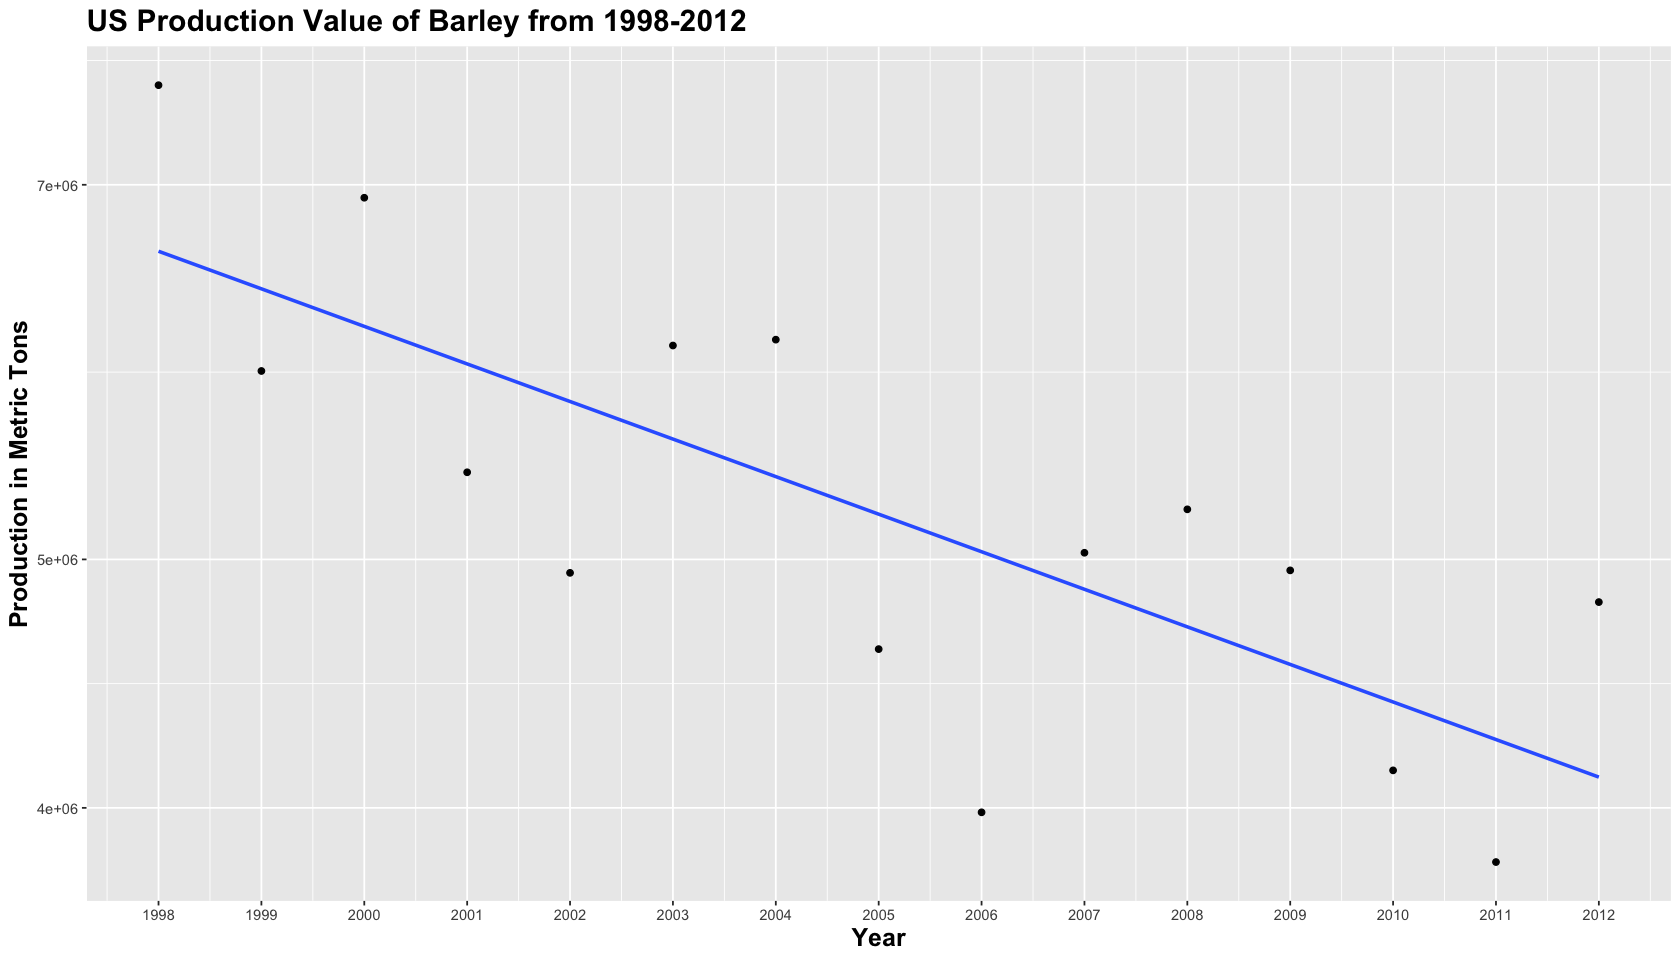

In [170]:
## Filtering out Barley and Creating a scatterplot with best line fit

ggplot(USDA_Barley, aes(x = Year, y = Value))+ 
                geom_point() + geom_smooth(method=lm, se=FALSE)+
                ggtitle('US Production Value of Barley from 1998-2012')+
                xlab('Year')+
                ylab('Production in Metric Tons')+
                theme(title = element_text(size= 15, face="bold"))+
                scale_x_continuous(breaks = 1998:2012)+
                scale_y_log10()

In [171]:
## We can see, there is a negative linear relationship between Barley production and Time.

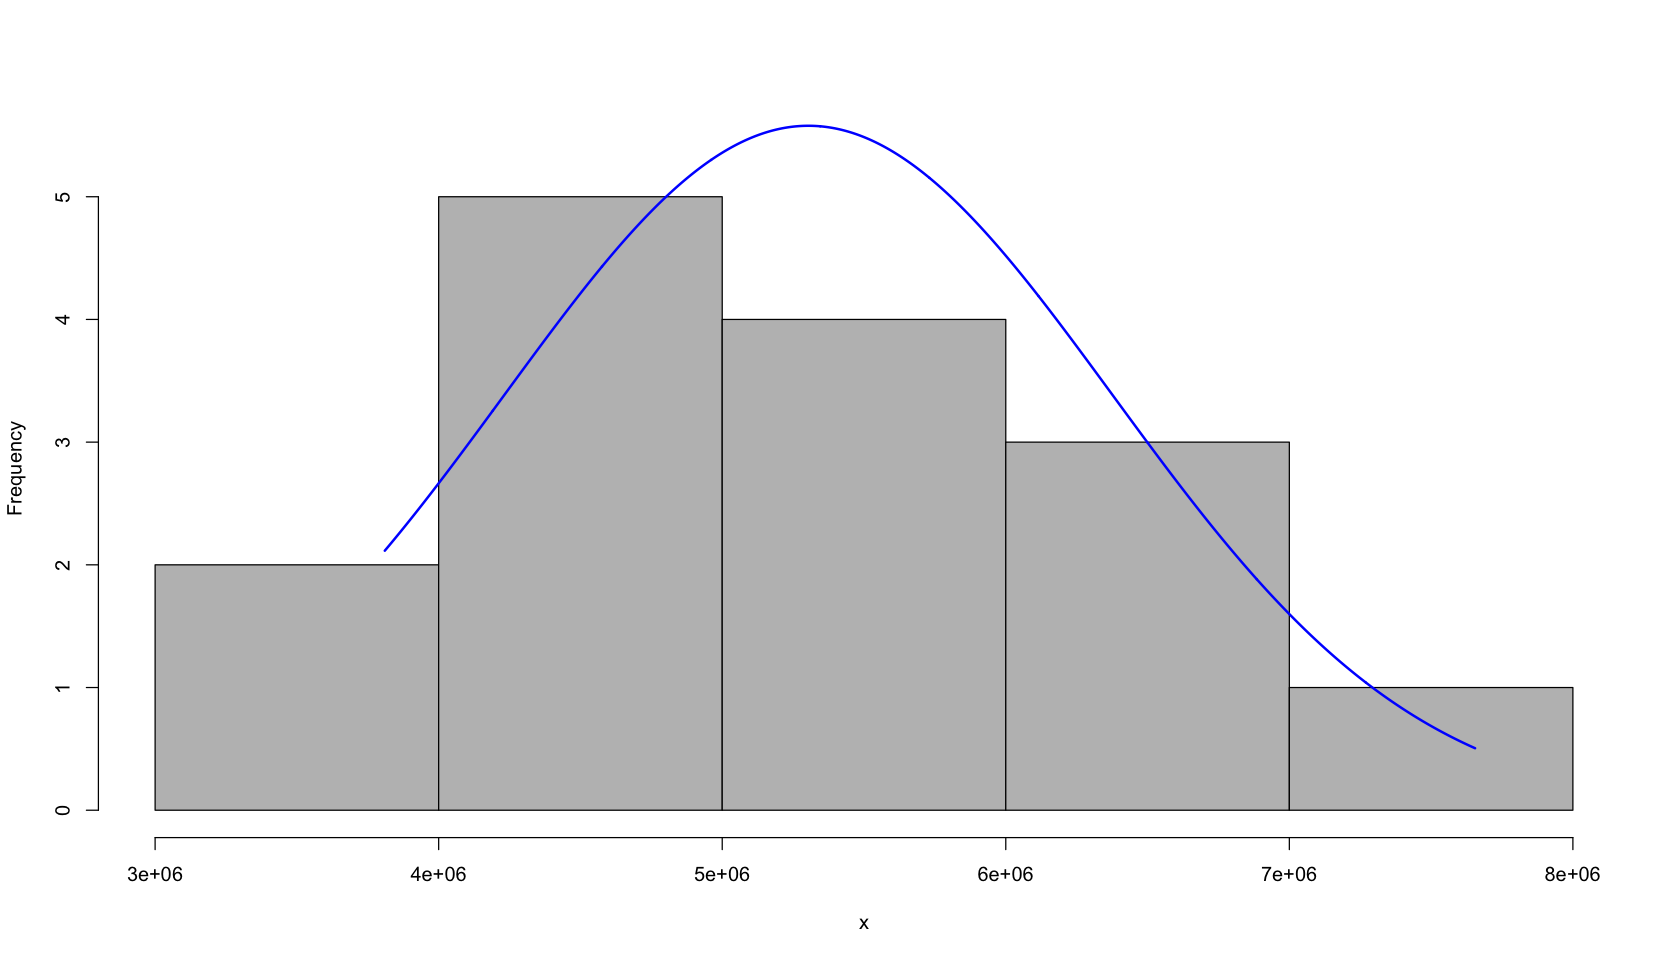

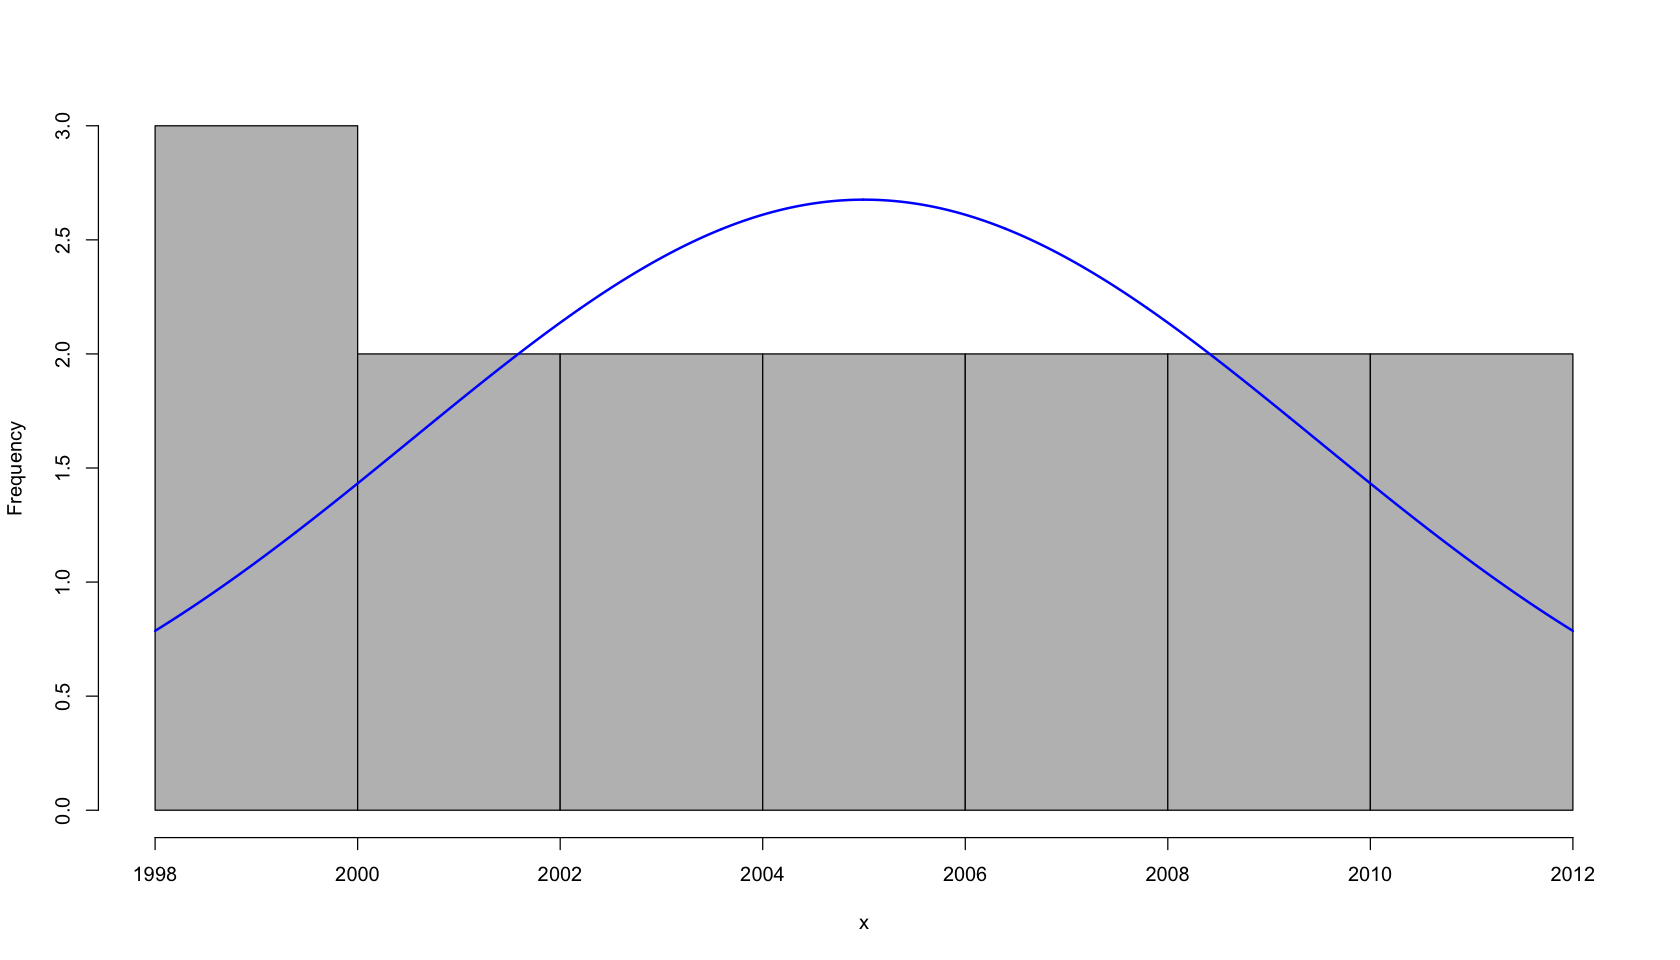

In [172]:
## Testing for Normality

plotNormalHistogram(USDA_Barley$Value)
plotNormalHistogram(USDA_Barley$Year)

In [173]:
### They both look decently distributed!

`geom_smooth()` using formula 'y ~ x'



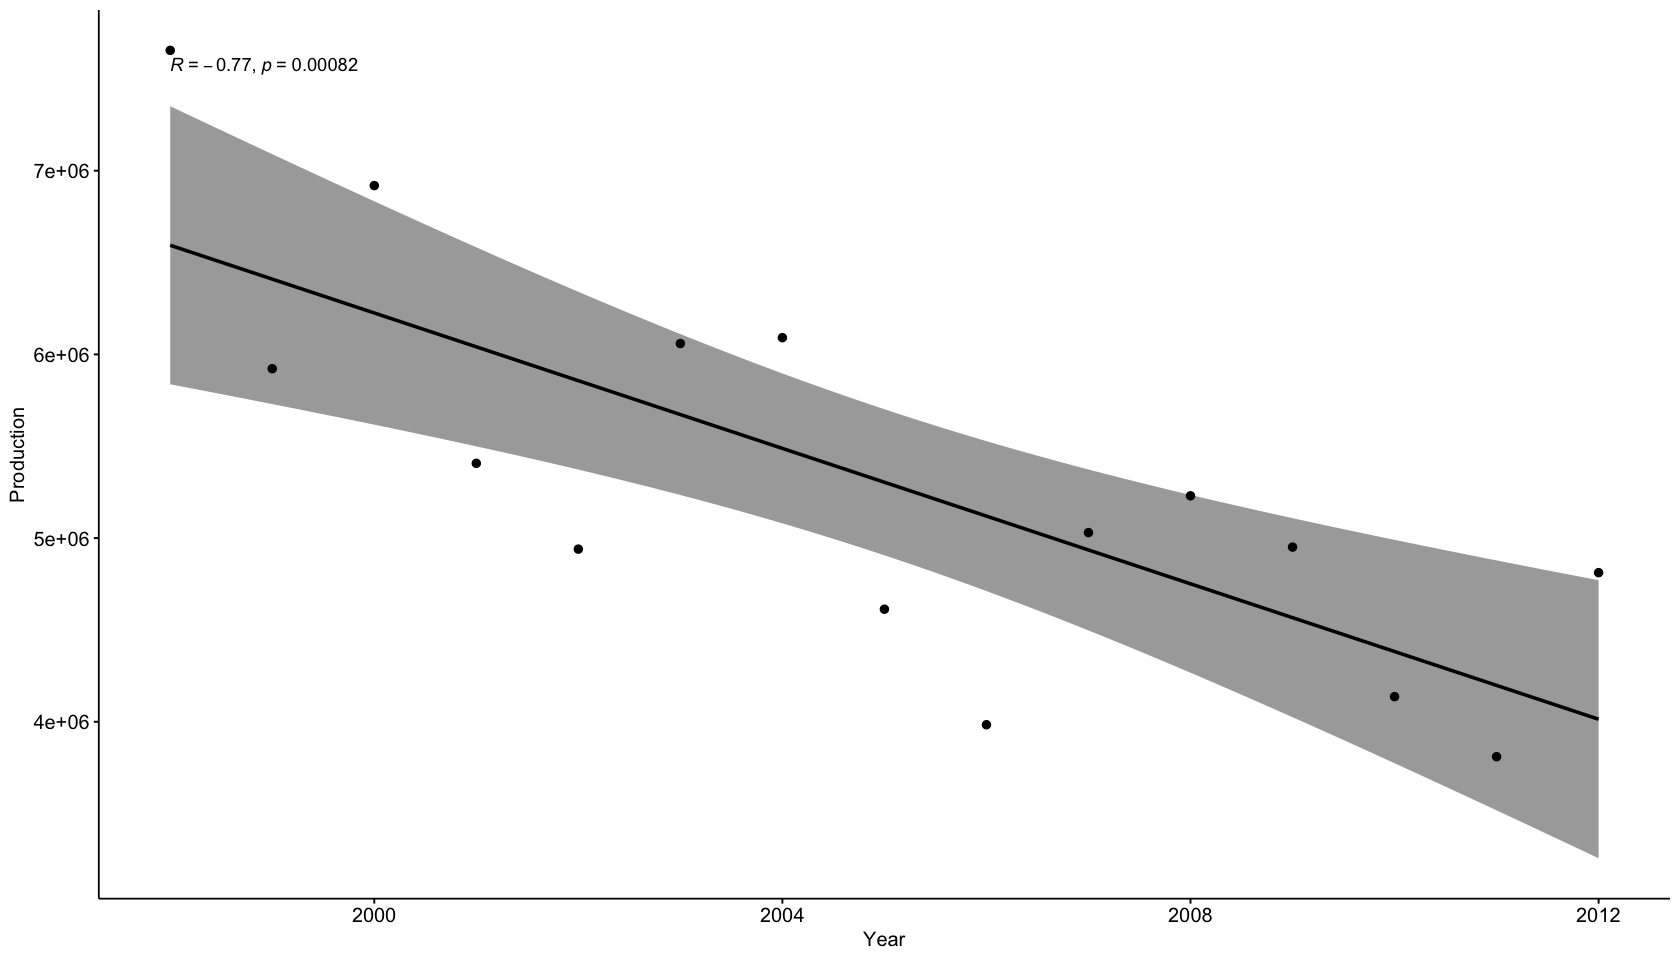

In [174]:
ggscatter(USDA_Barley, x = "Year", y = "Value", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Year", ylab = "Production")

In [175]:
## Looking at Pearson's correlation

cor.test(USDA_Barley$Year, USDA_Barley$Value, method="pearson", use = "complete.obs")


	Pearson's product-moment correlation

data:  USDA_Barley$Year and USDA_Barley$Value
t = -4.3277, df = 13, p-value = 0.0008202
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9189052 -0.4221946
sample estimates:
       cor 
-0.7682948 


In [176]:
### We see here there is a significant correlation between Barley production and time from 1998 - 2012. 
### At 92% we can be fairly confident of this correlation!

# The p-value of the test is 0.0008, which is less than the significance level alpha = 0.05.
# We can conclude that Barley production and Year are significantly correlated with a 
# correlation coefficient of -0.77 and p-value of .0008 .

## Running linear regression model



In [177]:
## Running linear regression model
Barley_LM <- lm(Value ~ Year, USDA_Barley)
print(Barley_LM)


Call:
lm(formula = Value ~ Year, data = USDA_Barley)

Coefficients:
(Intercept)         Year  
  374811179      -184293  



In [178]:
# Equation :
# The equation has the form Y = a + bX, where Y is the dependent variable 
# (that's the variable that goes on the Y axis), X is the independent variable 
# (i.e. it is plotted on the X axis), b is the slope of the line a


In [179]:
summary(Barley_LM)


Call:
lm(formula = Value ~ Year, data = USDA_Barley)

Residuals:
     Min       1Q   Median       3Q      Max 
-1135707  -560964    94586   540793  1060950 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 374811179   85382636   4.390 0.000731 ***
Year          -184293      42585  -4.328 0.000820 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 712600 on 13 degrees of freedom
Multiple R-squared:  0.5903,	Adjusted R-squared:  0.5588 
F-statistic: 18.73 on 1 and 13 DF,  p-value: 0.0008202


In [180]:
### We can see here that year is a significant predictor of production value, 
# after looking at adjusted R-squared we see that year accounts for 56% of production value. 

### 2 - What is the equation of the linear relationship between Barley and Honey from 1998-2012?

`geom_smooth()` using formula 'y ~ x'



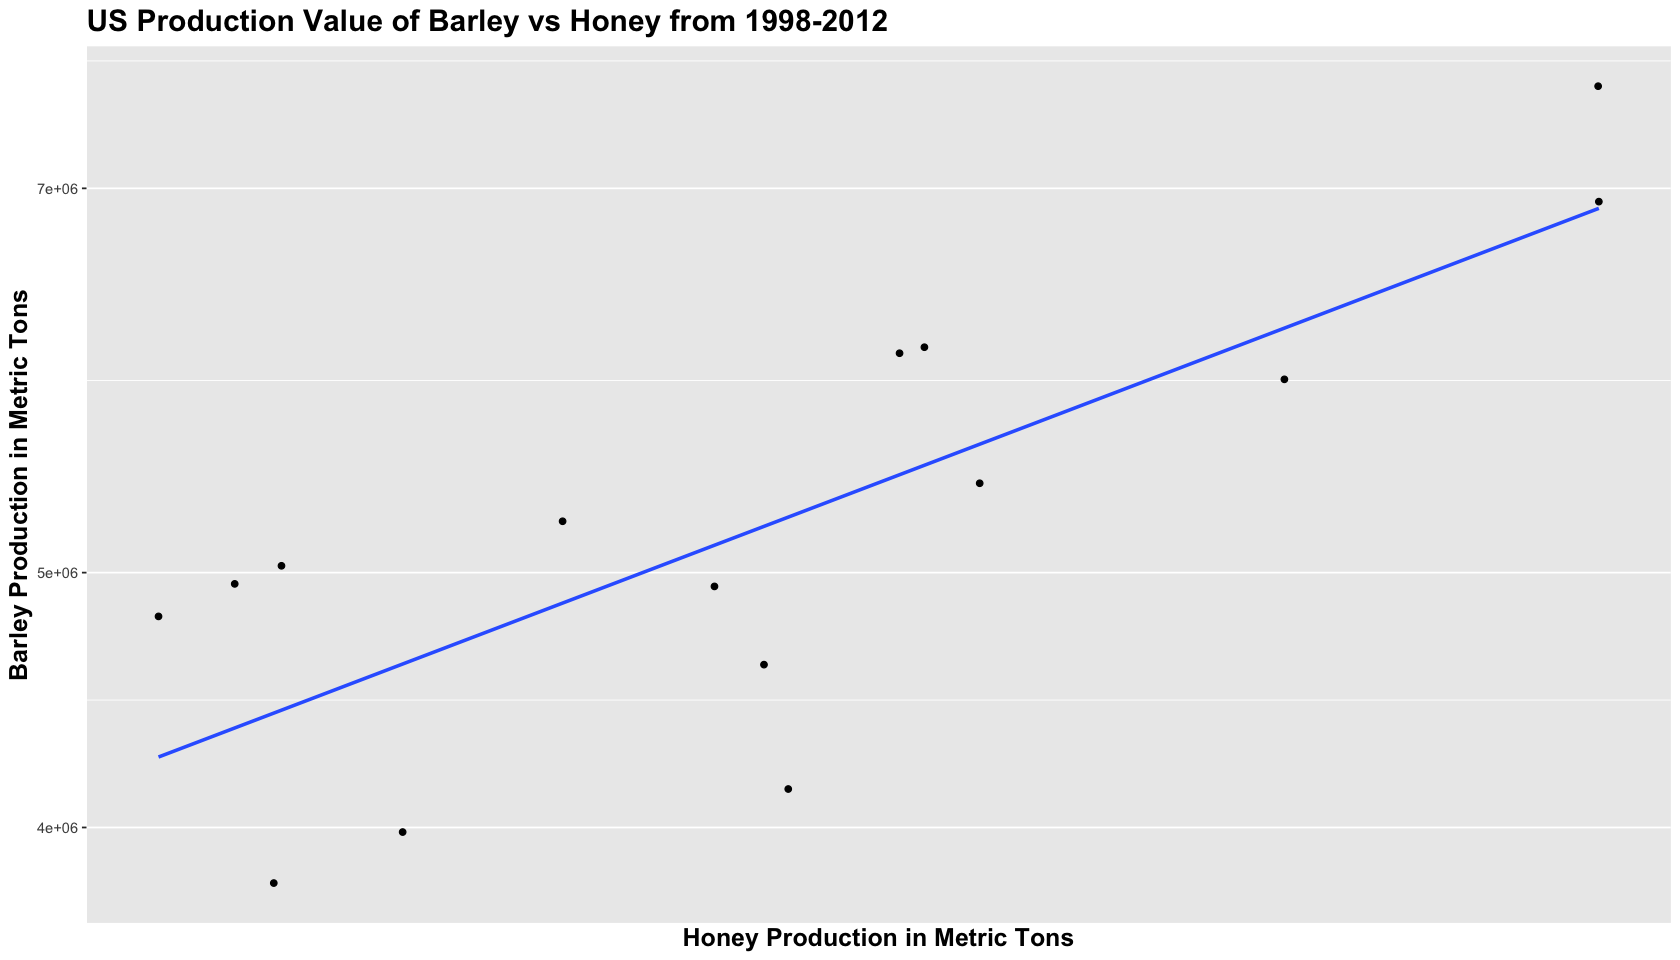

In [181]:
# Creating a scatterplot with best line fit

ggplot(FinalDSYear98to12, aes(x = HoneyValue, y = BarleyValue))+ 
                geom_point() + geom_smooth(method=lm, se=FALSE)+
                ggtitle('US Production Value of Barley vs Honey from 1998-2012')+
                xlab('Honey Production in Metric Tons')+
                ylab('Barley Production in Metric Tons')+
                theme(title = element_text(size= 15, face="bold"))+
                scale_x_continuous(breaks = 1998:2012)+
                scale_y_log10()

In [182]:
# We can see a direct positive correlation, matching the data we found in our correlation matrix.

`geom_smooth()` using formula 'y ~ x'



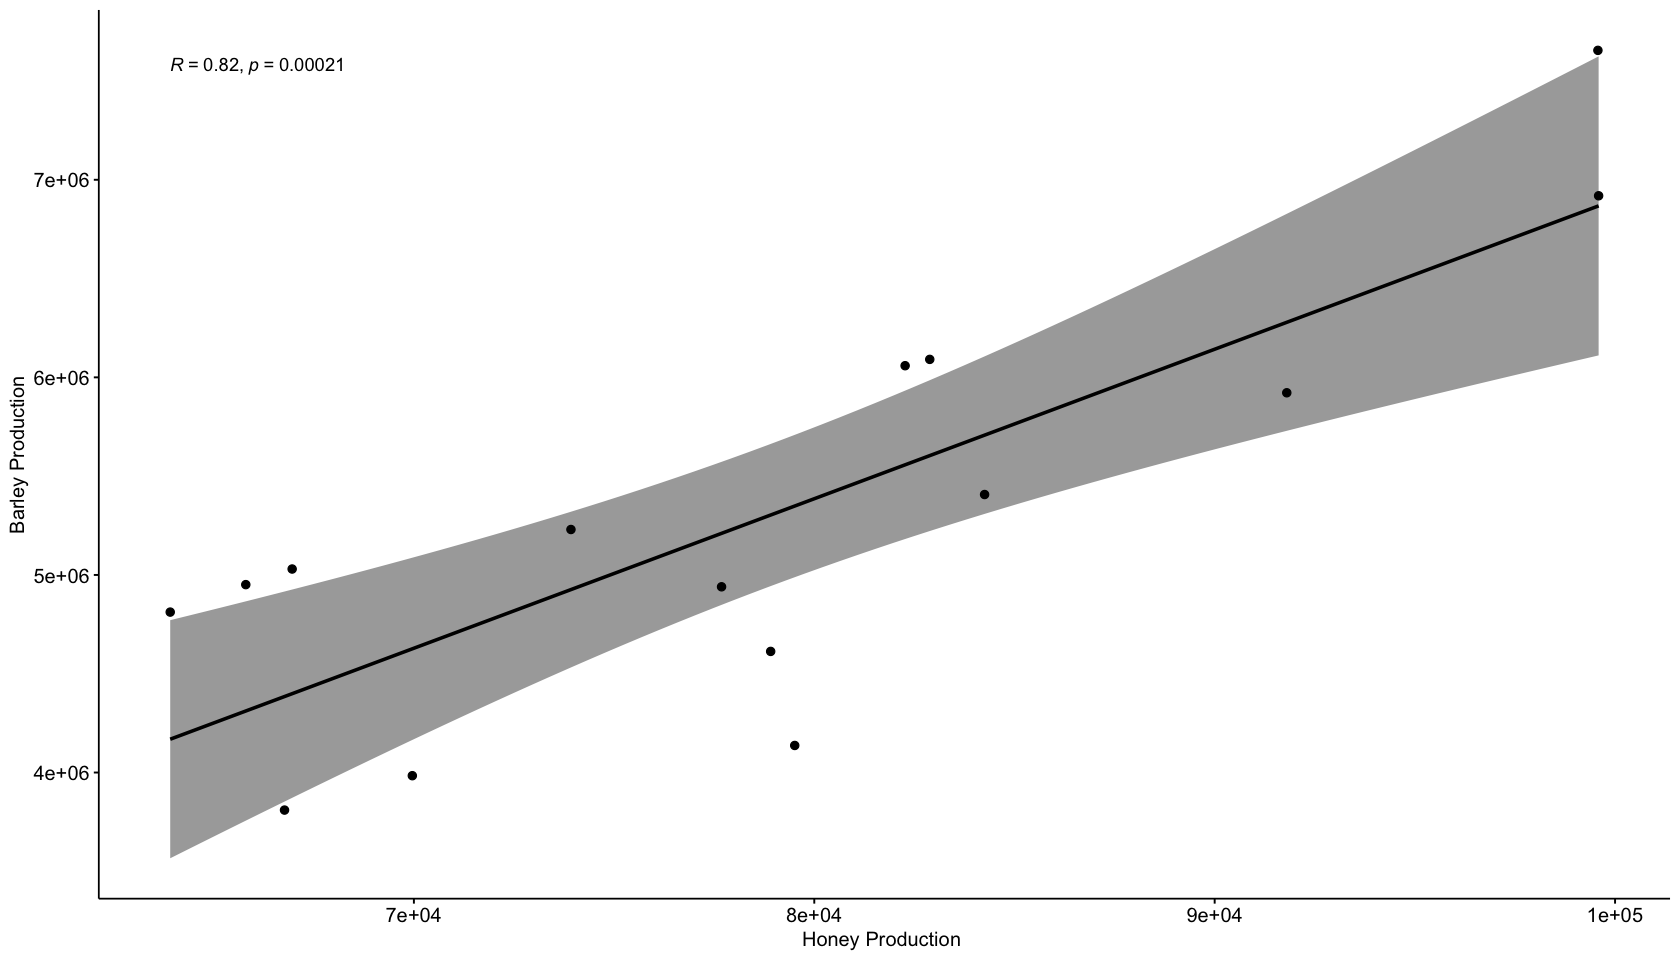

In [183]:
ggscatter(FinalDSYear98to12, x = "HoneyValue", y = "BarleyValue", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Honey Production ", ylab = "Barley Production")

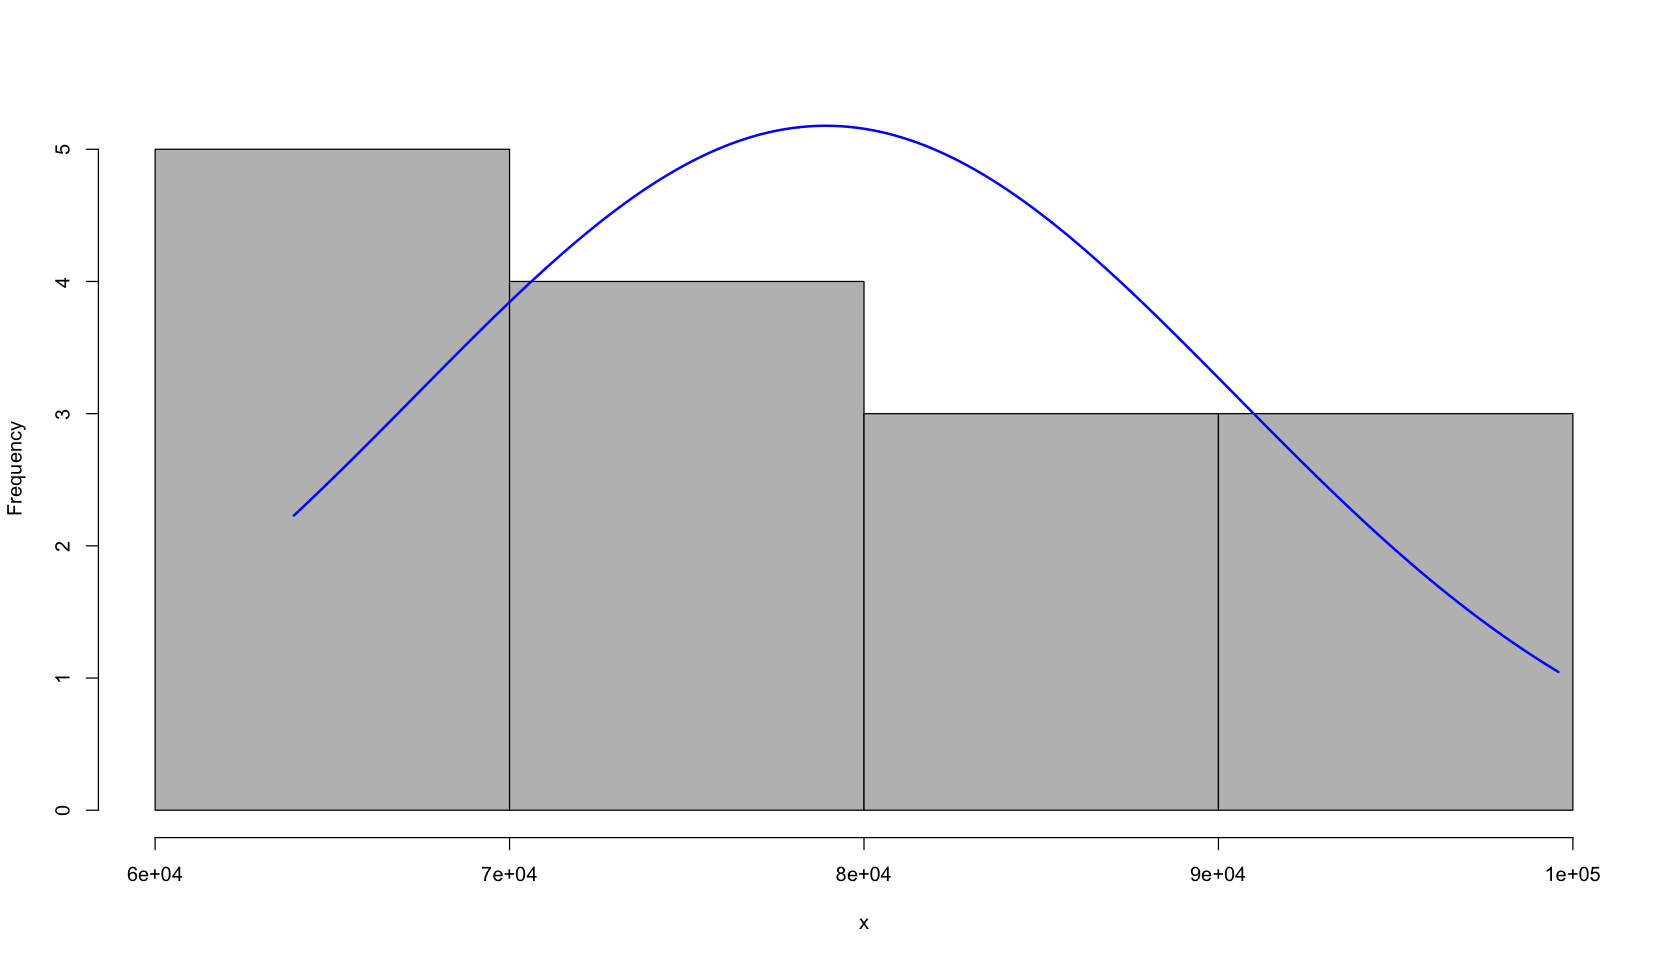

In [184]:
# Looking at distribution of Honey production data

plotNormalHistogram(FinalDSYear98to12$HoneyValue)

In [185]:
# Looks pretty Normally distributed

In [186]:
## Running Pearson's correlation

cor.test(FinalDSYear98to12$HoneyValue, FinalDSYear98to12$BarleyValue, method="pearson", use = "complete.obs")


	Pearson's product-moment correlation

data:  FinalDSYear98to12$HoneyValue and FinalDSYear98to12$BarleyValue
t = 5.0745, df = 13, p-value = 0.0002131
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5201153 0.9364120
sample estimates:
     cor 
0.815184 


In [187]:
### We see here there is a significant correlation between Barley production and Honey Production from 1998 - 2012. 
### At 94% we can be fairly confident of this correlation!

# The p-value of the test is 0.0002, which is less than the significance level alpha = 0.05.
# We can conclude that Barley production and Honey production are significantly correlated with a 
# correlation coefficient of .82 and p-value of .0008 .

In [188]:
## Running linear regression model

BarleyHoney_LM <- lm(BarleyValue ~ HoneyValue, FinalDSYear98to12)
print(BarleyHoney_LM)


Call:
lm(formula = BarleyValue ~ HoneyValue, data = FinalDSYear98to12)

Coefficients:
(Intercept)   HoneyValue  
 -667323.41        75.66  



In [189]:
# Equation y = 76*Honey -667323

In [190]:
summary(BarleyHoney_LM)


Call:
lm(formula = BarleyValue ~ HoneyValue, data = FinalDSYear98to12)

Residuals:
     Min       1Q   Median       3Q      Max 
-1211758  -465598    51104   566312   788442 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -667323.41 1188439.61  -0.562 0.583999    
HoneyValue       75.66      14.91   5.075 0.000213 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 644800 on 13 degrees of freedom
Multiple R-squared:  0.6645,	Adjusted R-squared:  0.6387 
F-statistic: 25.75 on 1 and 13 DF,  p-value: 0.0002131


In [191]:
### We can see here that there is a significant influence of Honey on Barley production;
# after looking at adjusted R-squared we see that Honey accounts for 64% of production value of Barley. 

#### Running Linear Regressions on Highly Correlated Commodity - Oats 



In [192]:
# Running Linear Regressions on Highly Correlated Commodity - Oats 
## 1 - How do Oats production values changed from 1998-2012?
## 2 - What is the equation of the linear relationship between Oats and Honey from 1998-2012?

### 1 - How do Oats production values changed from 1998-2012?

`geom_smooth()` using formula 'y ~ x'



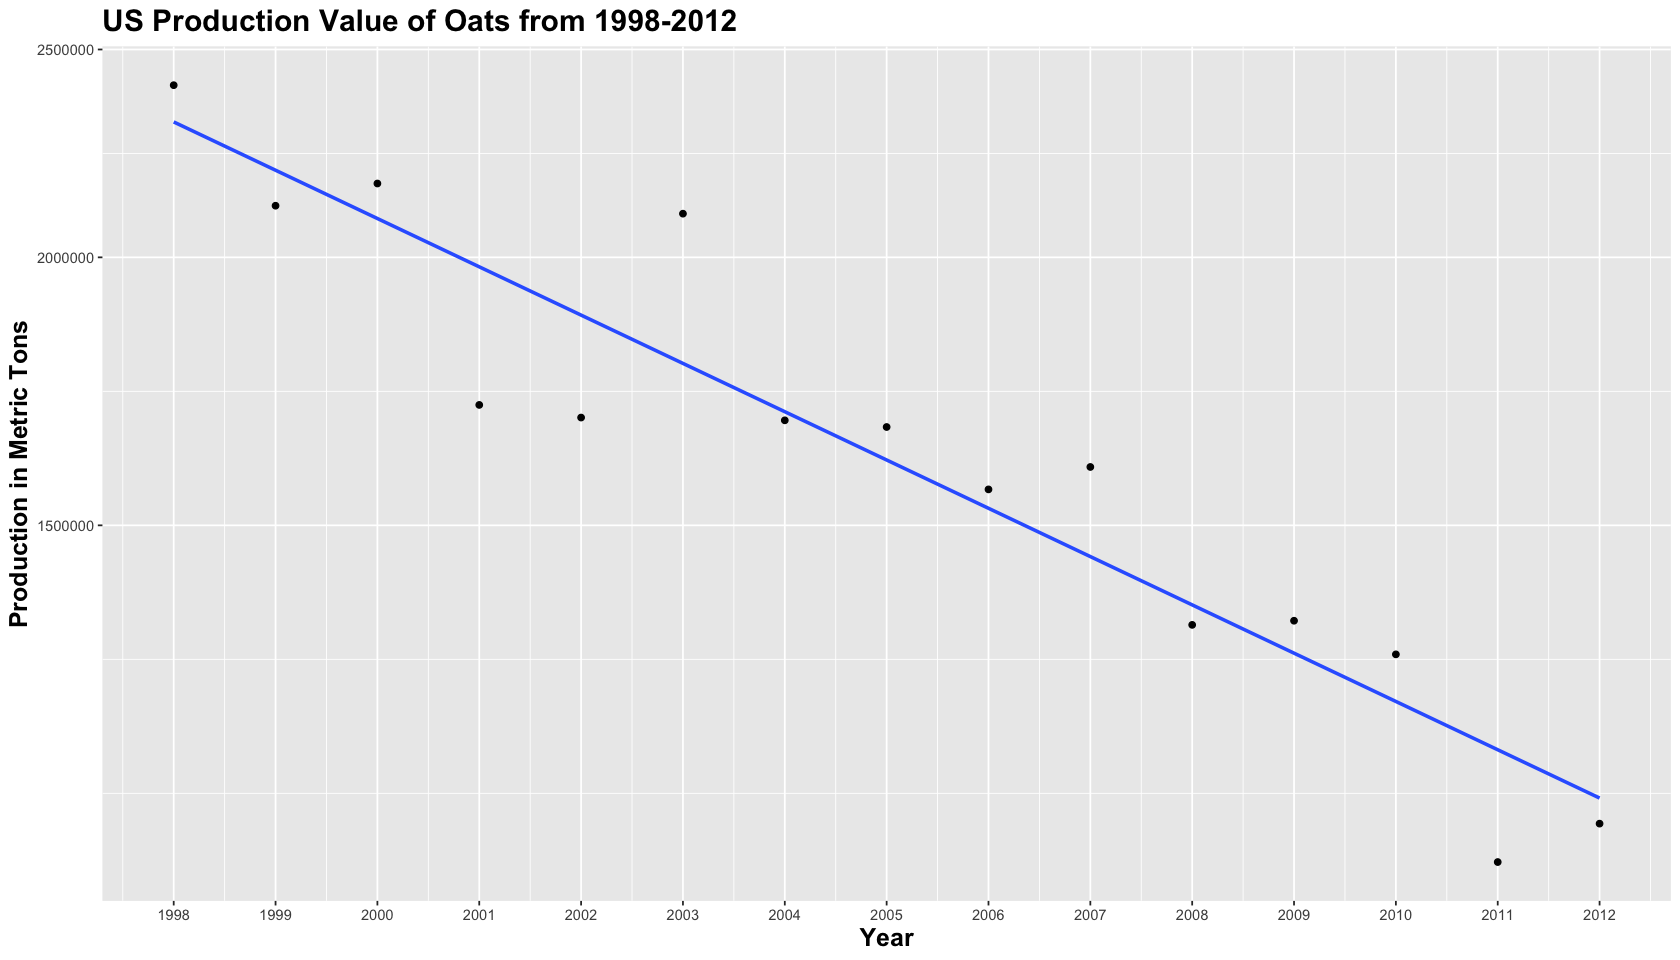

In [193]:
## Filtering out Oats and Creating a scatterplot with best line fit

ggplot(FinalDSYear98to12, aes(x = Year, y = OatsValue))+ 
                geom_point() + geom_smooth(method=lm, se=FALSE)+
                ggtitle('US Production Value of Oats from 1998-2012')+
                xlab('Year')+
                ylab('Production in Metric Tons')+
                theme(title = element_text(size= 15, face="bold"))+
                scale_x_continuous(breaks = 1998:2012)+
                scale_y_log10()

In [194]:
## We can see, there is a negative linear relationship between Oats production and Time.

`geom_smooth()` using formula 'y ~ x'



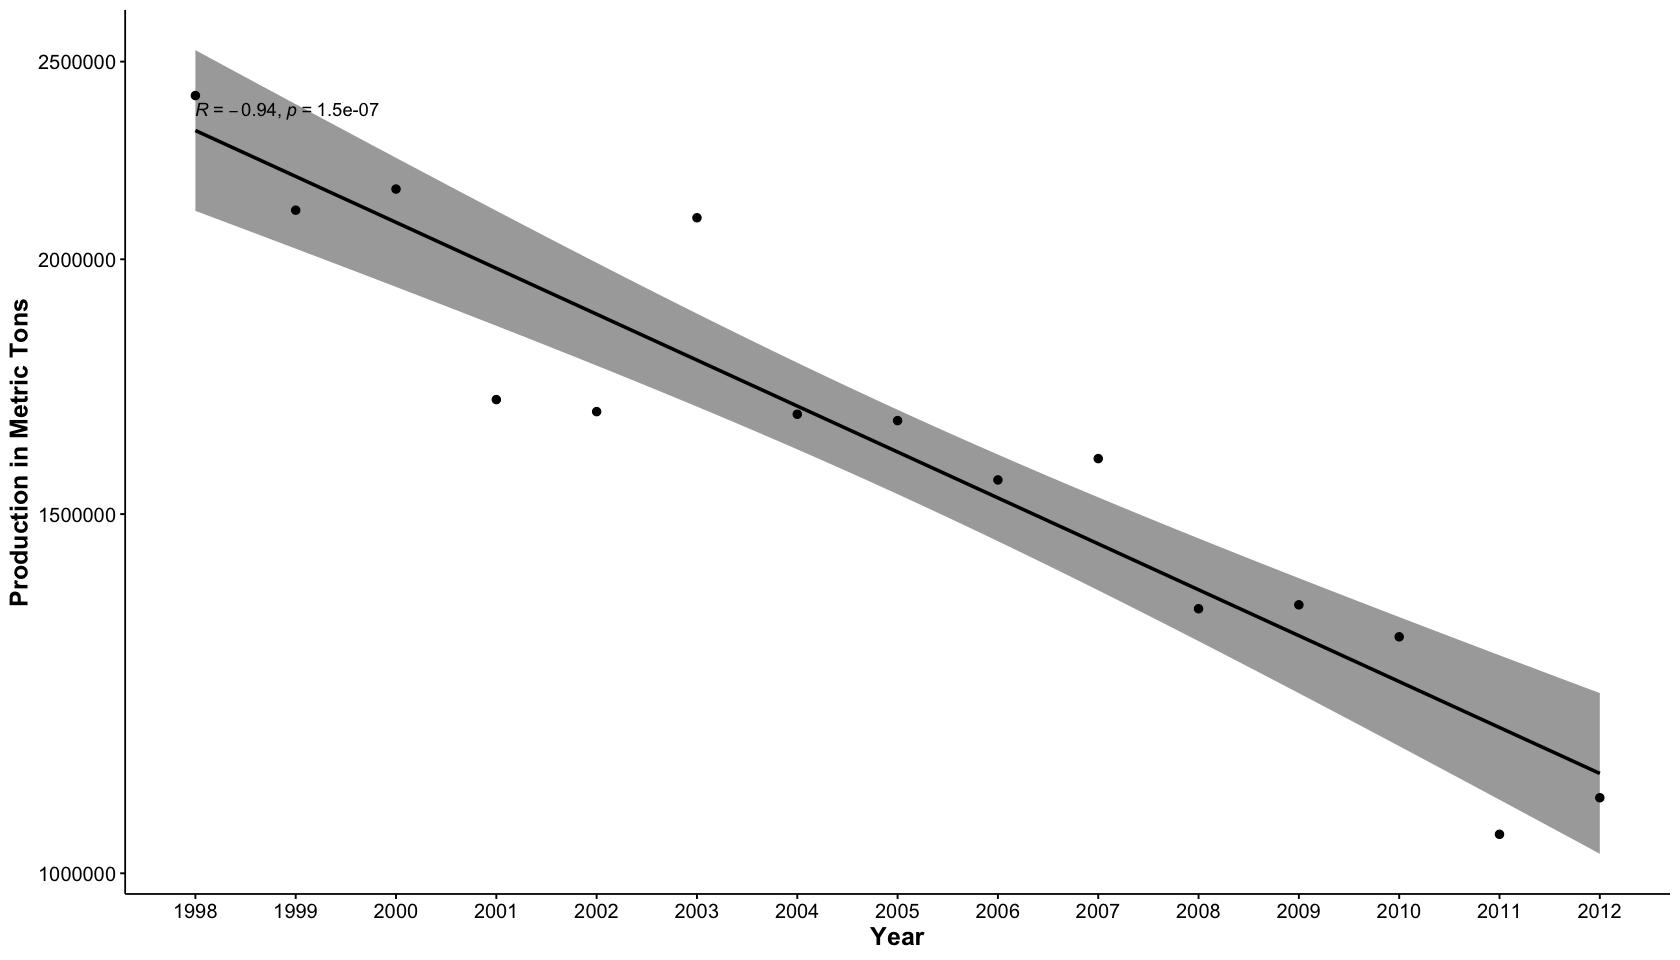

In [195]:
# Scatter Plot using Peasrson Correlation

ggscatter(FinalDSYear98to12, x = 'Year', y = 'OatsValue', 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Year", ylab = "Production in Metric Tons")+
                theme(title = element_text(size= 15, face="bold"))+
                scale_x_continuous(breaks = 1998:2012)+
                scale_y_log10()


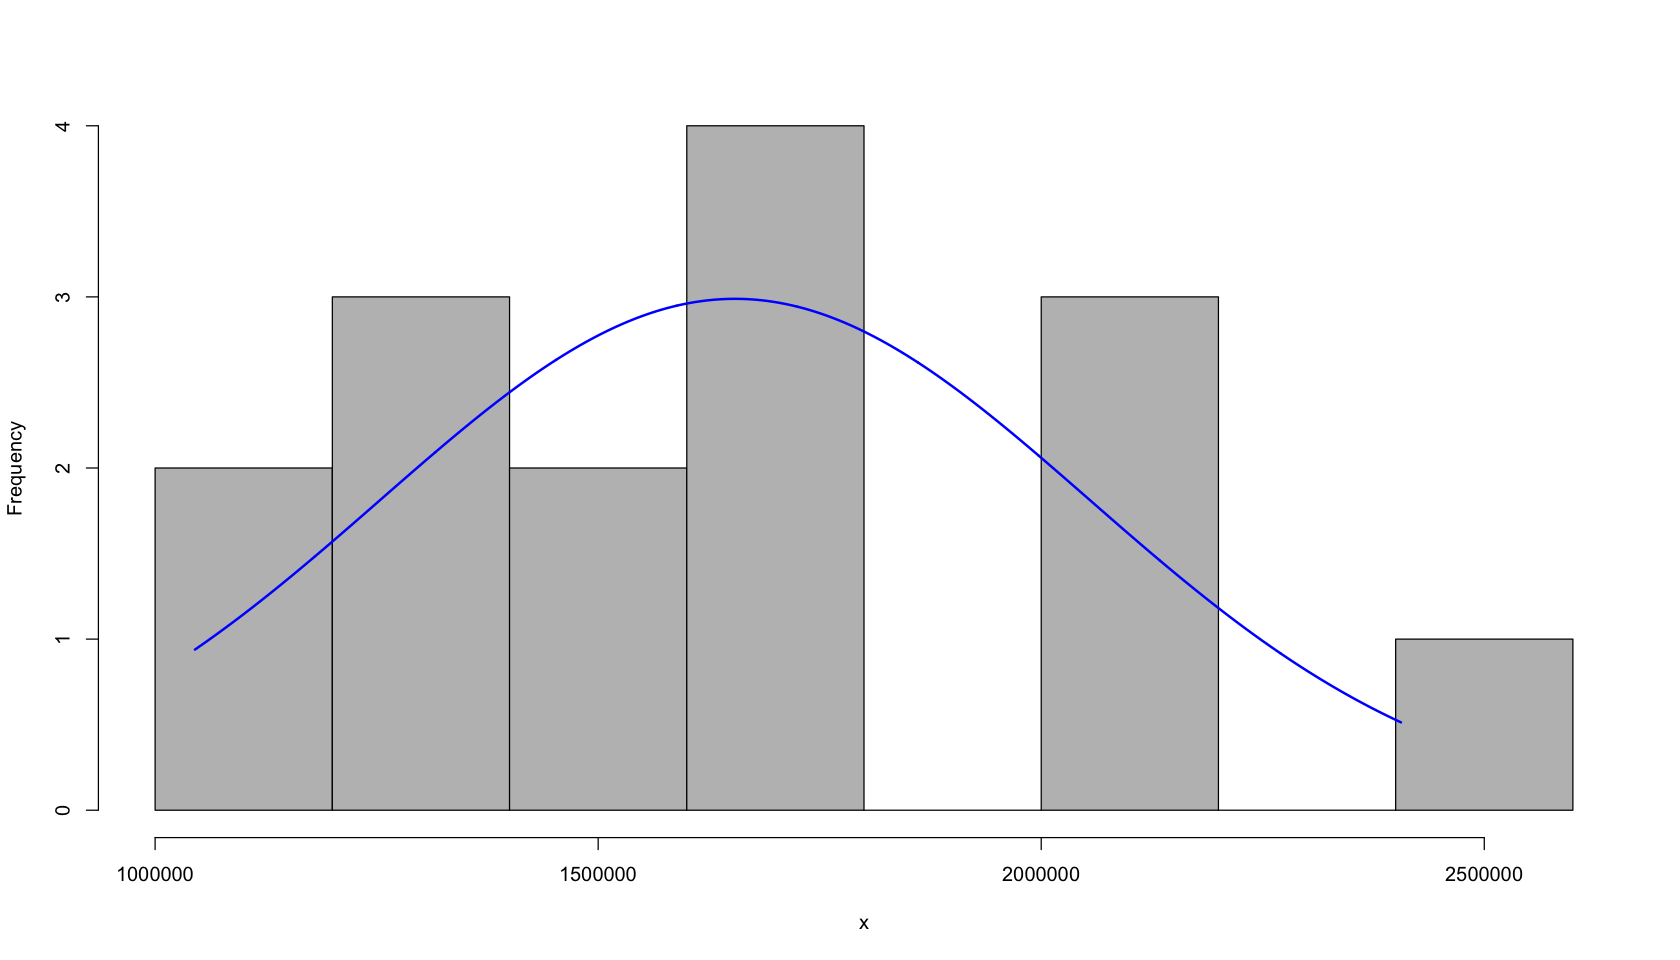

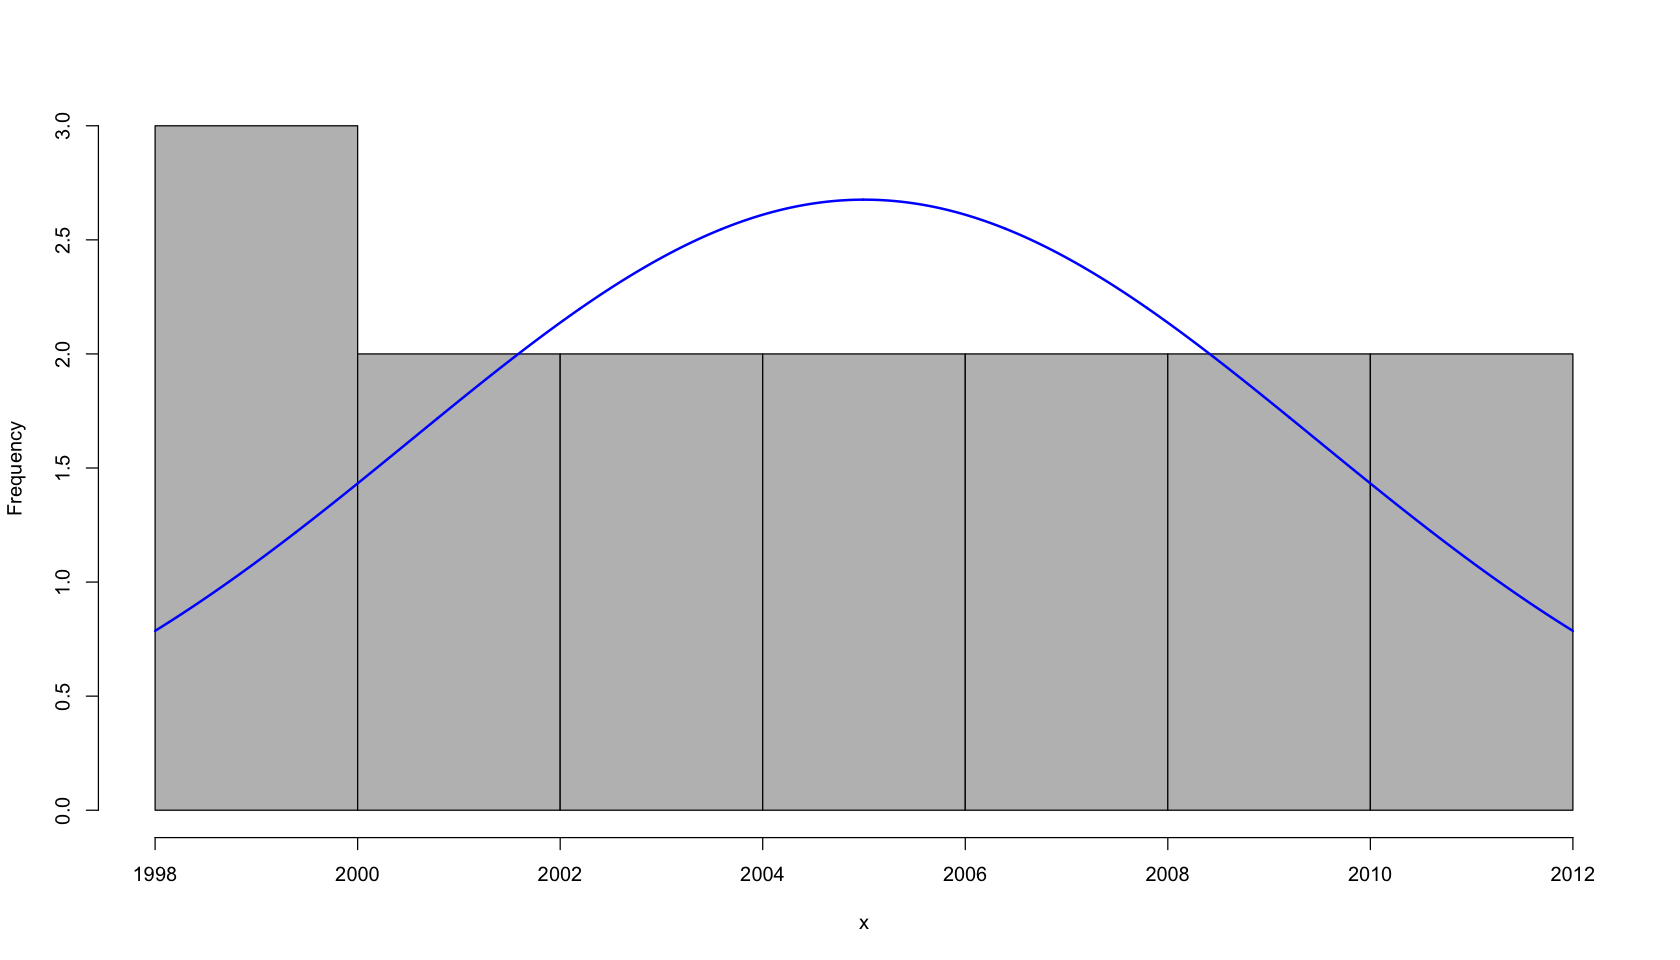

In [196]:
## Testing for Normality

plotNormalHistogram(FinalDSYear98to12$OatsValue)
plotNormalHistogram(FinalDSYear98to12$Year)

In [197]:
## They both are decently normally distributed

In [198]:
## Looking at Pearson's correlation

cor.test(FinalDSYear98to12$OatsValue, FinalDSYear98to12$Year, method="pearson", use = "complete.obs")


	Pearson's product-moment correlation

data:  FinalDSYear98to12$OatsValue and FinalDSYear98to12$Year
t = -9.5796, df = 13, p-value = 2.955e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9788691 -0.8138024
sample estimates:
       cor 
-0.9359047 


In [199]:
### We see here there is a significant correlation between Oats production and time from 1998 - 2012. 
### At 98% we can be fairly confident of this correlation!

# The p-value of the test is 2.955e-07, which is less than the significance level alpha = 0.05.
# We can conclude that Oats production and Year are significantly correlated with a 
# correlation coefficient of -0.77 and p-value of .0008 .

### Running linear regression model



In [200]:
## Running linear regression model

Oats_LM <- lm(OatsValue ~ Year, FinalDSYear98to12)
print(Oats_LM)


Call:
lm(formula = OatsValue ~ Year, data = FinalDSYear98to12)

Coefficients:
(Intercept)         Year  
  169687721       -83807  



In [201]:
summary(Oats_LM)


Call:
lm(formula = OatsValue ~ Year, data = FinalDSYear98to12)

Residuals:
    Min      1Q  Median      3Q     Max 
-282629  -57093   12600   81100  273986 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 169687721   17540759   9.674 2.64e-07 ***
Year           -83807       8748  -9.580 2.95e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 146400 on 13 degrees of freedom
Multiple R-squared:  0.8759,	Adjusted R-squared:  0.8664 
F-statistic: 91.77 on 1 and 13 DF,  p-value: 2.955e-07


In [202]:
### We can see here that year is a significant predictor of production value,
# after looking at adjusted R-squared we see that year accounts for 87% of Oats production value. 

### 2 - What is the equation of the linear relationship between Oats and Honey from 1998-2012?

`geom_smooth()` using formula 'y ~ x'



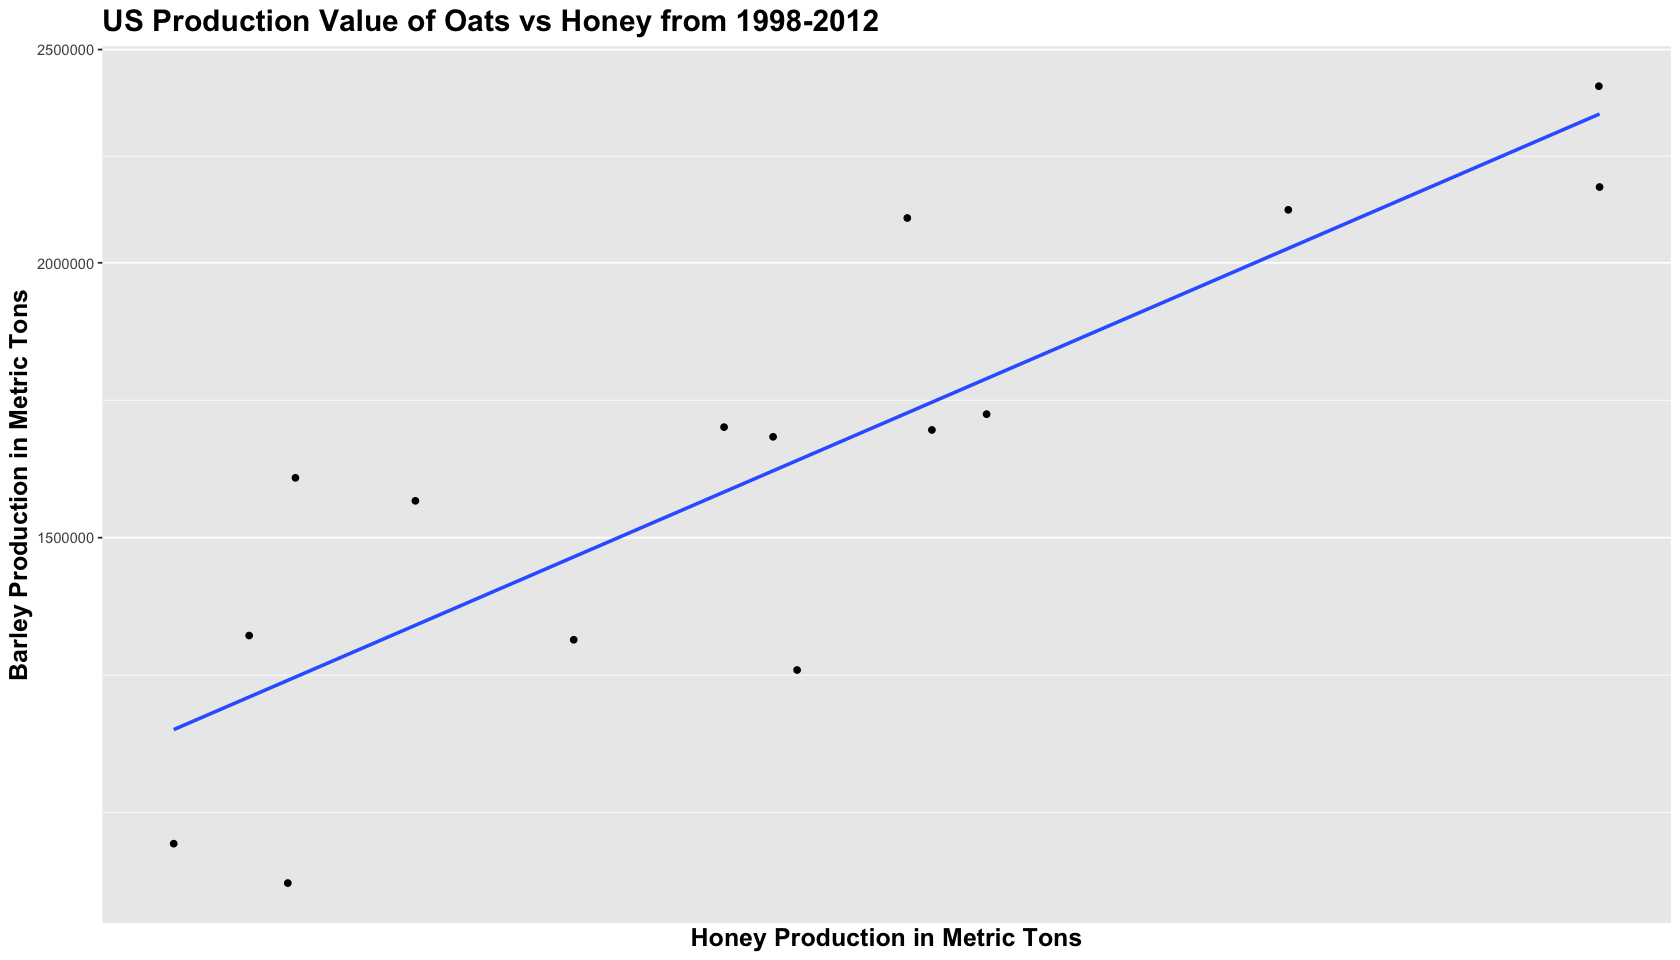

In [203]:
# Creating a scatterplot with best line fit

ggplot(FinalDSYear98to12, aes(x = HoneyValue, y = OatsValue))+ 
                geom_point() + geom_smooth(method=lm, se=FALSE)+
                ggtitle('US Production Value of Oats vs Honey from 1998-2012')+
                xlab('Honey Production in Metric Tons')+
                ylab('Barley Production in Metric Tons')+
                theme(title = element_text(size= 15, face="bold"))+
                scale_x_continuous(breaks = 1998:2012)+
                scale_y_log10()

`geom_smooth()` using formula 'y ~ x'



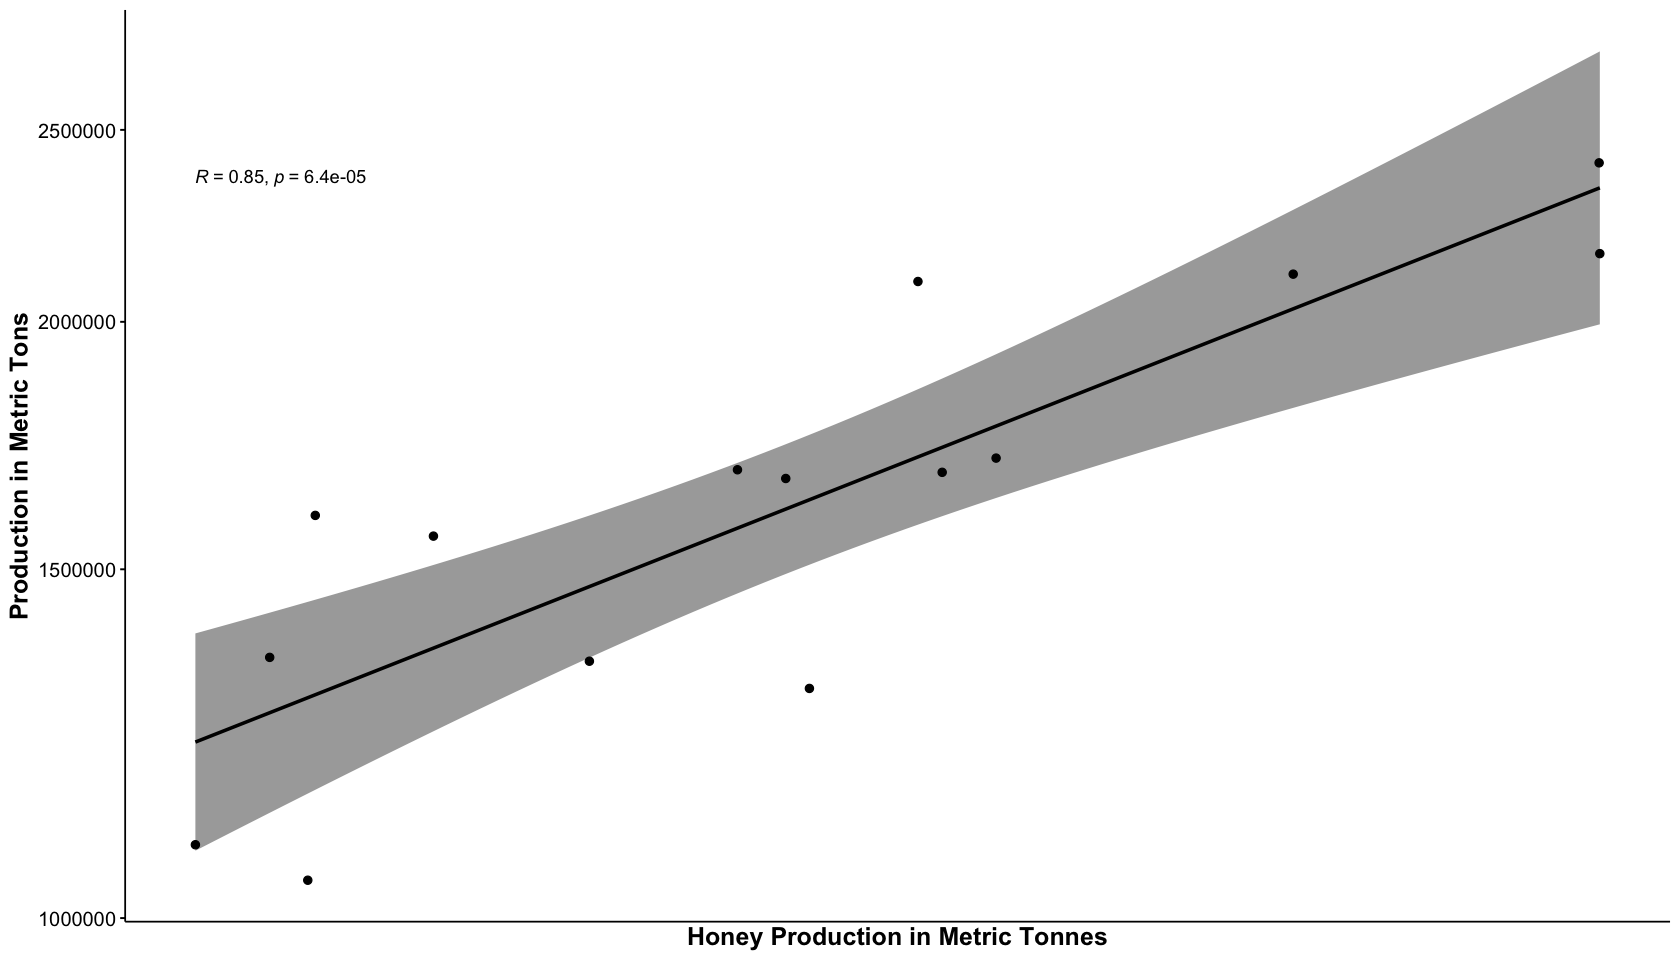

In [204]:
ggscatter(FinalDSYear98to12, x = 'HoneyValue', y = 'OatsValue', 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Honey Production in Metric Tonnes", ylab = "Production in Metric Tons")+
                theme(title = element_text(size= 15, face="bold"))+
                scale_x_continuous(breaks = 1998:2012)+
                scale_y_log10()

In [205]:
# We can see a direct positive correlation, matching the data we found in our correlation matrix.

In [206]:
# Since we saw earlier, bot Oats and Honey are normally distributed; we'll directly jump to Pearson's Cor

## Running Pearson's correlation

cor.test(FinalDSYear98to12$HoneyValue, FinalDSYear98to12$OatsValue, method="pearson", use = "complete.obs")




	Pearson's product-moment correlation

data:  FinalDSYear98to12$HoneyValue and FinalDSYear98to12$OatsValue
t = 6.4268, df = 13, p-value = 2.247e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6504673 0.9568913
sample estimates:
      cor 
0.8721281 


In [207]:
### We see here there is a significant correlation between Honey production and Oats from 1998 - 2012. 

# The p-value of the test is 2.247e-05, which is less than the significance level alpha = 0.05.
# We can conclude that Oats production and Year are significantly correlated with a 
# correlation coefficient of 0.87 and p-value of 2.247e-05 .

In [208]:
## Running linear regression model

OatsHoney_LM <- lm(OatsValue ~ HoneyValue, FinalDSYear98to12)
print(OatsHoney_LM)


Call:
lm(formula = OatsValue ~ HoneyValue, data = FinalDSYear98to12)

Coefficients:
(Intercept)   HoneyValue  
 -730466.50        30.22  



In [209]:
# The equation will be: y = 30.22(Honey) - 730466.5

In [210]:
summary(OatsHoney_LM)


Call:
lm(formula = OatsValue ~ HoneyValue, data = FinalDSYear98to12)

Residuals:
    Min      1Q  Median      3Q     Max 
-366276 -112967   12886  111783  340414 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.305e+05  3.748e+05  -1.949   0.0732 .  
HoneyValue   3.022e+01  4.702e+00   6.427 2.25e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 203300 on 13 degrees of freedom
Multiple R-squared:  0.7606,	Adjusted R-squared:  0.7422 
F-statistic:  41.3 on 1 and 13 DF,  p-value: 2.247e-05


In [211]:
### We can see here that there is a significant influence of Honey on Oats production; 
# after looking at adjusted R-squared we see that Honey accounts for 75% of production value of Oats. 

#### Running Linear Regressions on Highly Correlated Commodity - Rye 




In [212]:
# Running Linear Regressions on Highly Correlated Commodity - Rye 
## 1 - How do Rye production values changed from 1998-2012?
## 2 - What is the equation of the linear relationship between Rye and Honey from 1998-2012?

### 1 - How do Rye production values changed from 1998-2012?

In [213]:
# Filtering out production for Rye commodity

USDA_Rye <- Grouped_Honey_DS3 %>%
  filter(Commodity_Description == "Rye") %>%
  arrange(desc(Value))

View(USDA_Rye)

Commodity_Description,Year,Value,Country_Code,Country_Name,Attribute_Description,Unit_Description
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Rye,1998,309000,US,United States,Production,(MT)
Rye,1999,280000,US,United States,Production,(MT)
Rye,2003,219000,US,United States,Production,(MT)
Rye,2000,213000,US,United States,Production,(MT)
Rye,2008,211000,US,United States,Production,(MT)
Rye,2004,210000,US,United States,Production,(MT)
Rye,2007,206000,US,United States,Production,(MT)
Rye,2012,192000,US,United States,Production,(MT)
Rye,2005,191000,US,United States,Production,(MT)


`geom_smooth()` using formula 'y ~ x'



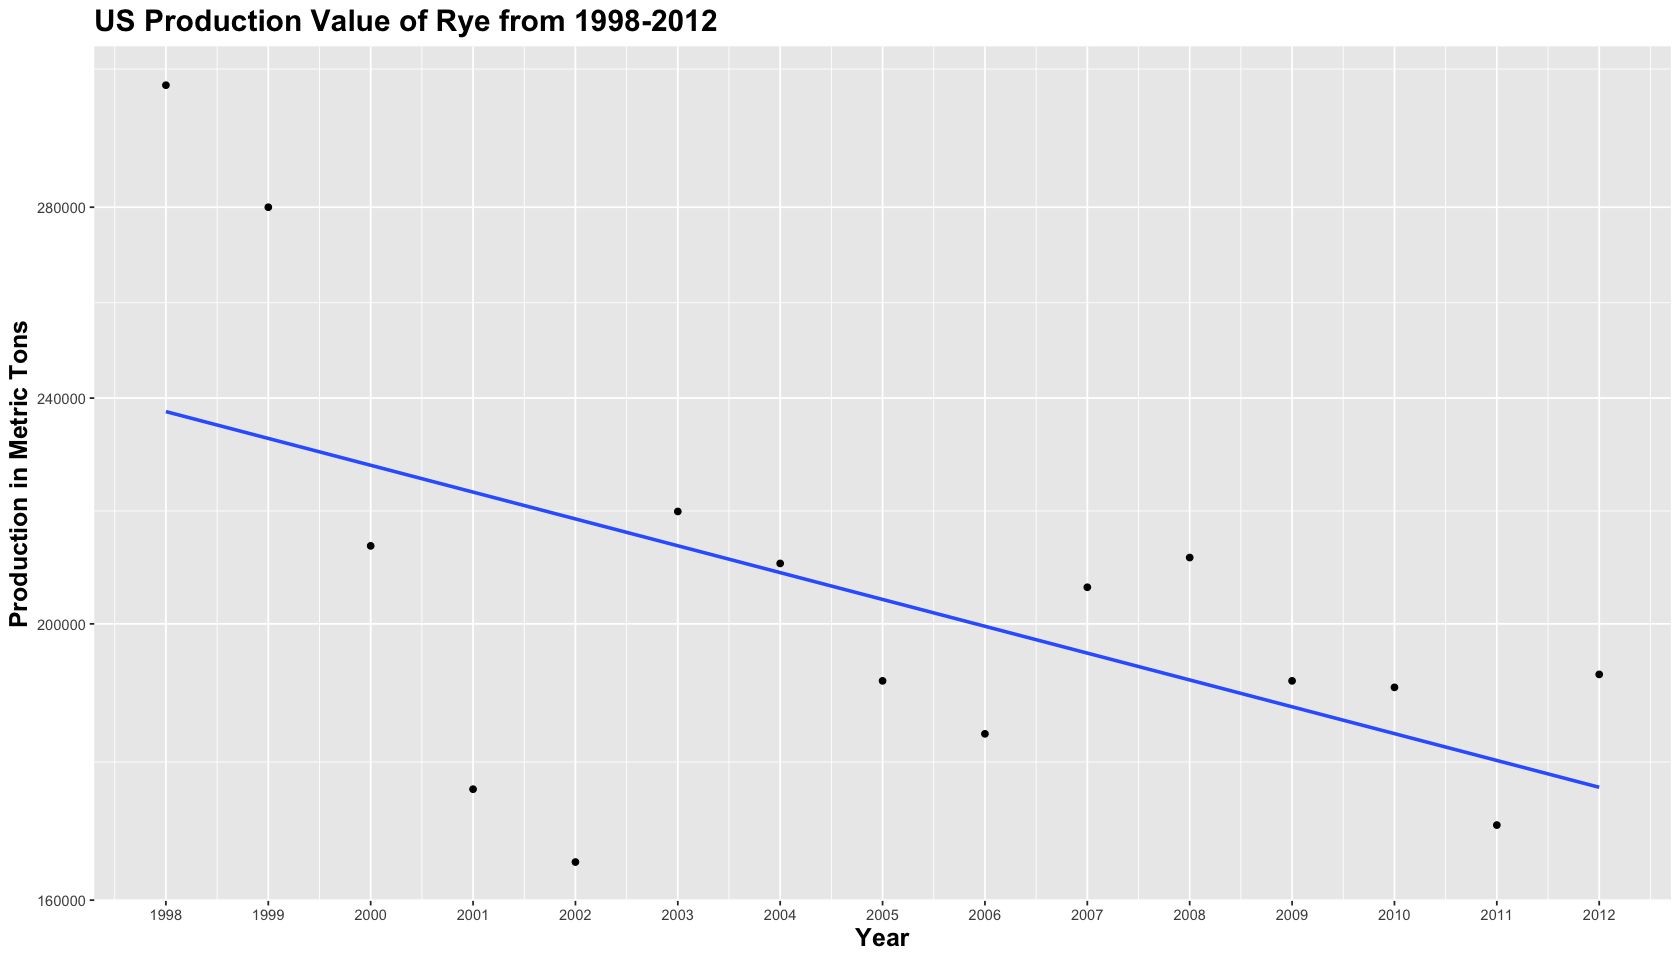

In [214]:
## Filtering out Rye and Creating a scatterplot with best line fit

ggplot(USDA_Rye, aes(x = Year, y = Value))+ 
                geom_point() + geom_smooth(method=lm, se=FALSE)+
                ggtitle('US Production Value of Rye from 1998-2012')+
                xlab('Year')+
                ylab('Production in Metric Tons')+
                theme(title = element_text(size= 15, face="bold"))+
                scale_x_continuous(breaks = 1998:2012)+
                scale_y_log10()

In [215]:
## We can see, there is a negative linear relationship between Rye production and Time.

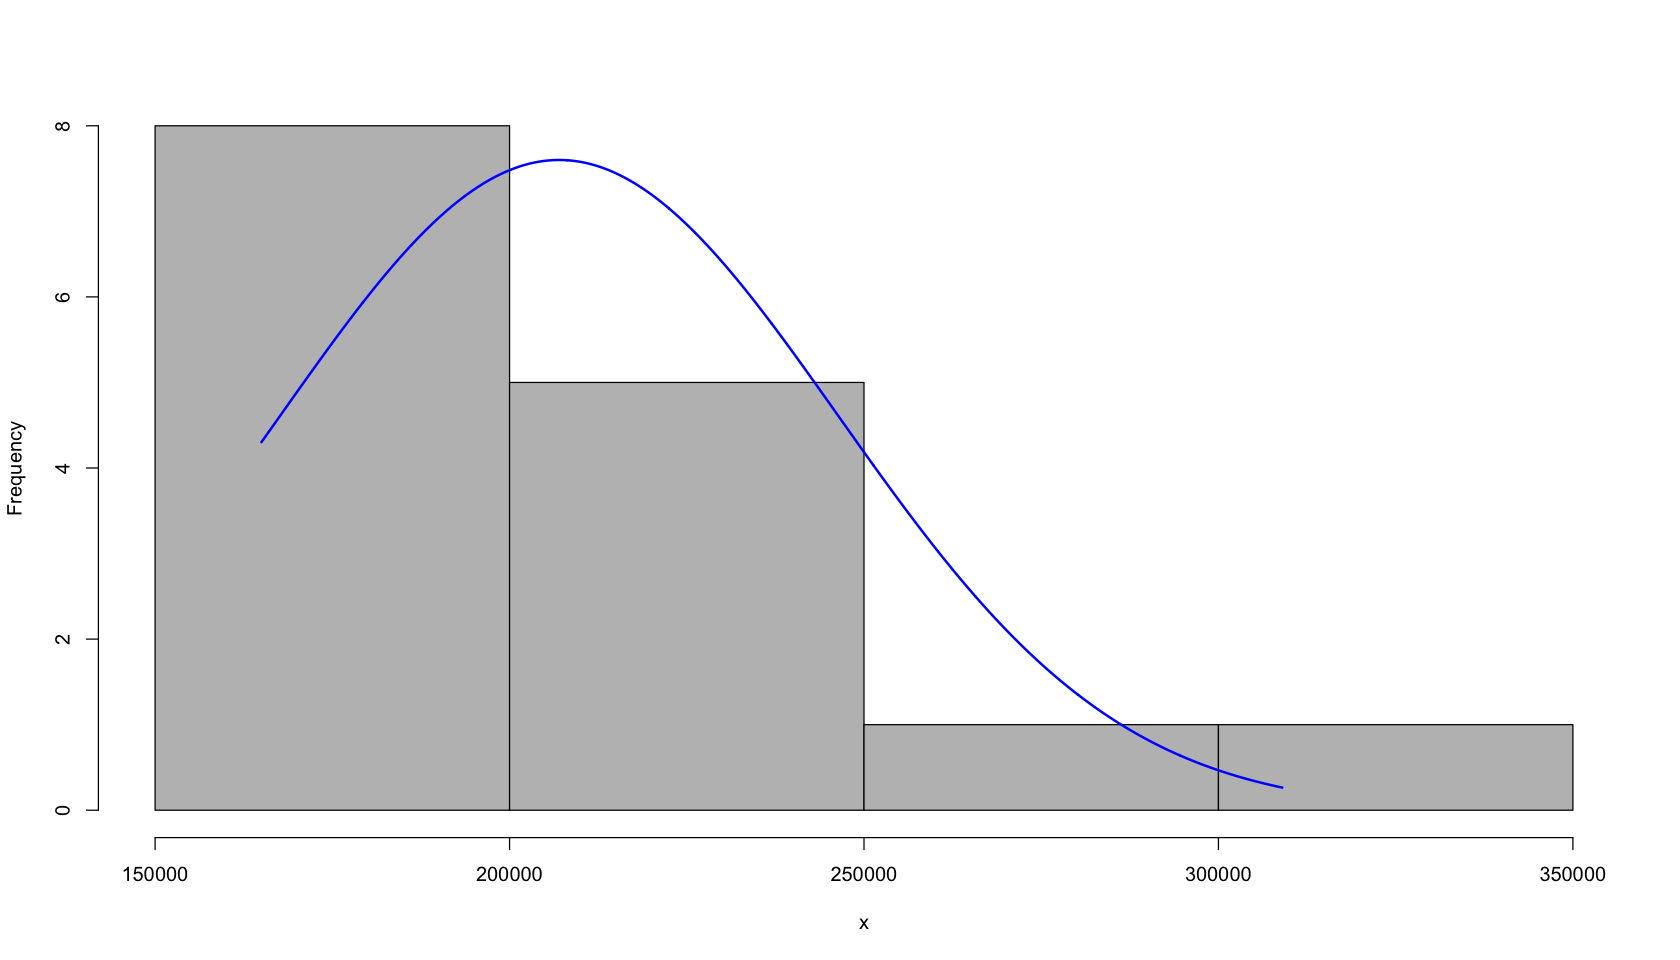

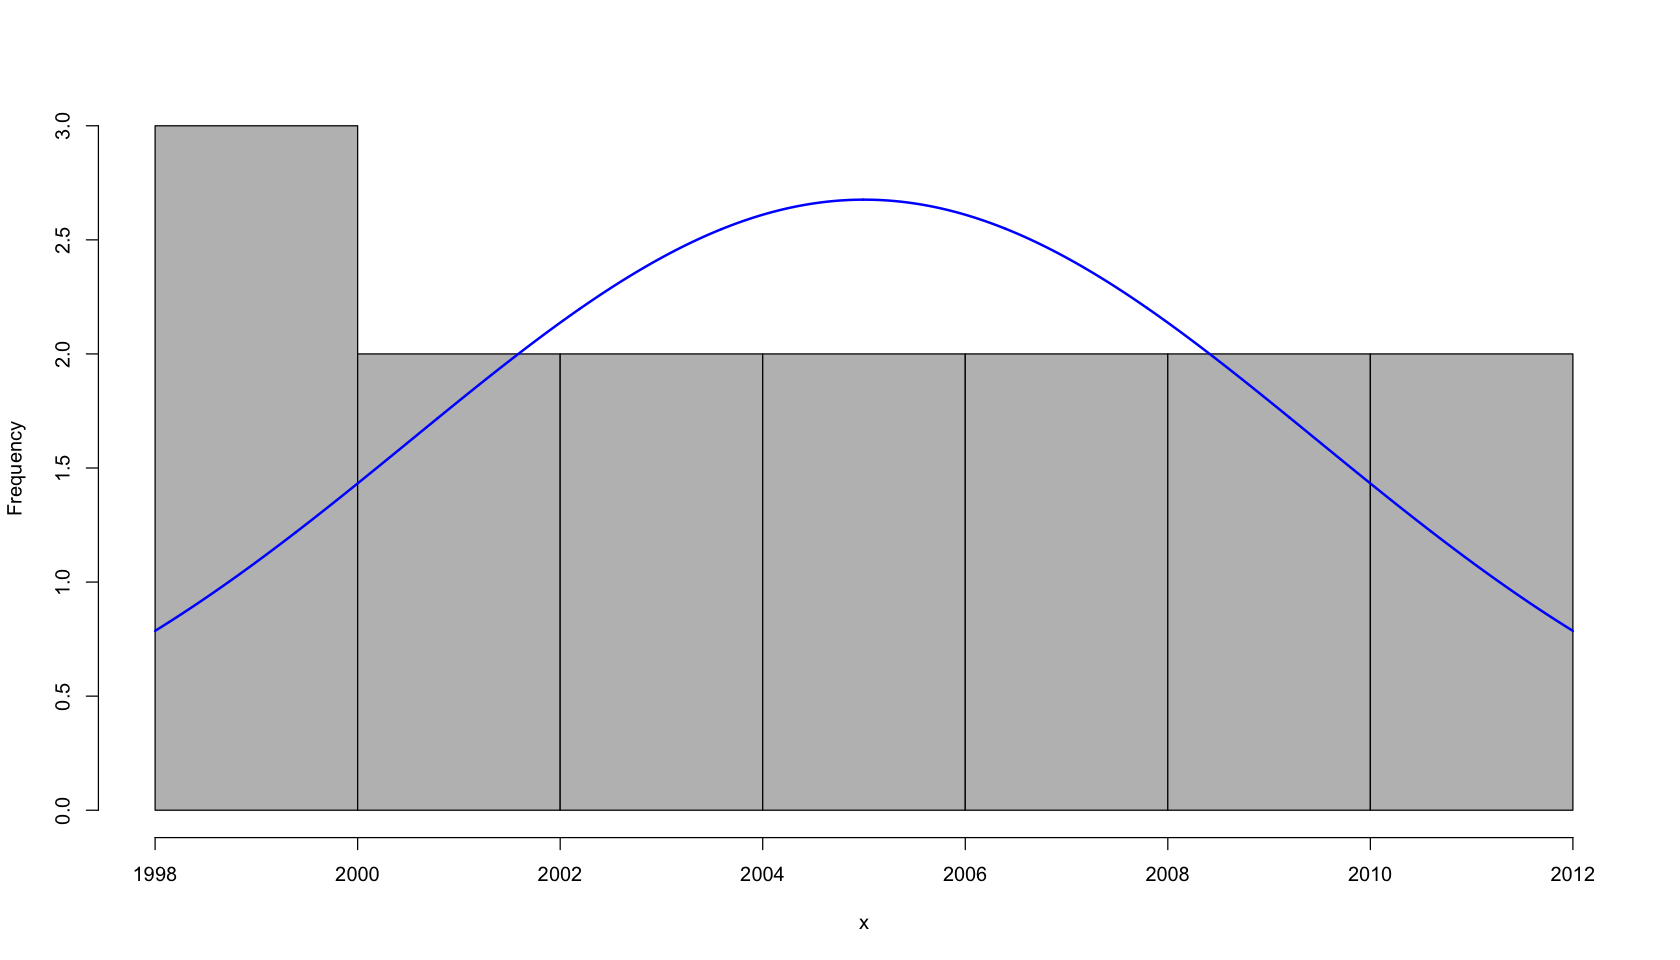

In [216]:
## Testing for Normality

plotNormalHistogram(USDA_Rye$Value)

plotNormalHistogram(USDA_Rye$Year)

In [217]:
# We can see the Rye production doesn't look normal. And is positively skewed. 
# Let's Normalise it using sqrt function

USDA_Rye$ValueSQRT <- sqrt(USDA_Rye$Value)


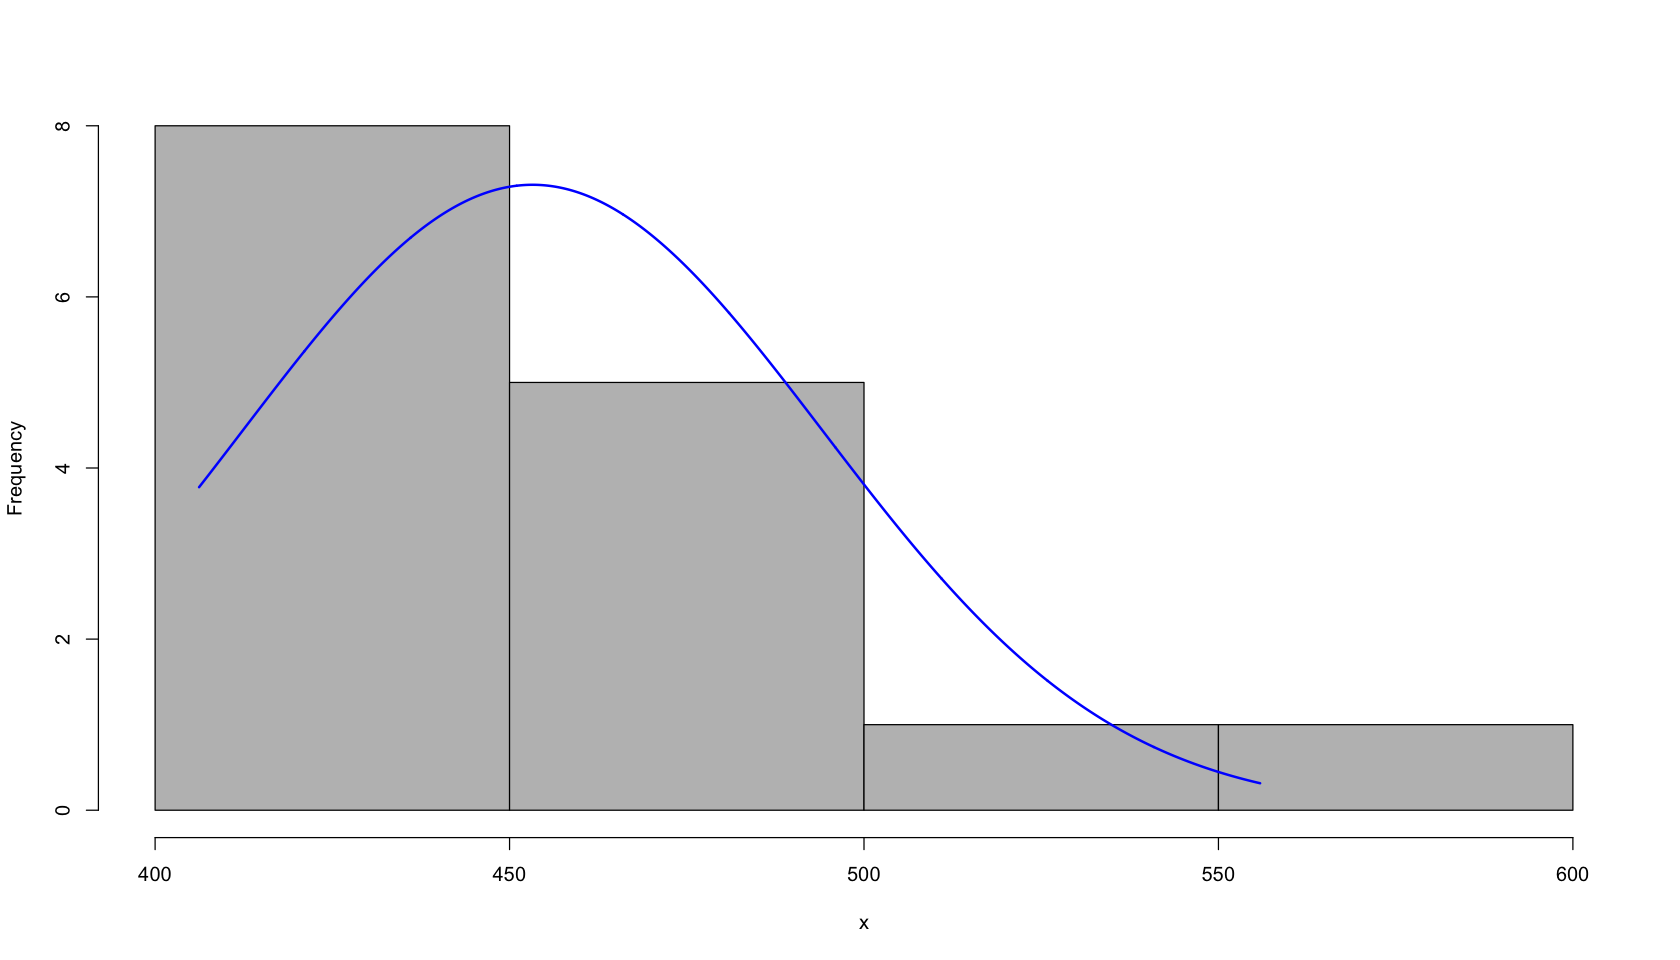

In [218]:
# Let's plot the new Value

plotNormalHistogram(USDA_Rye$ValueSQRT)

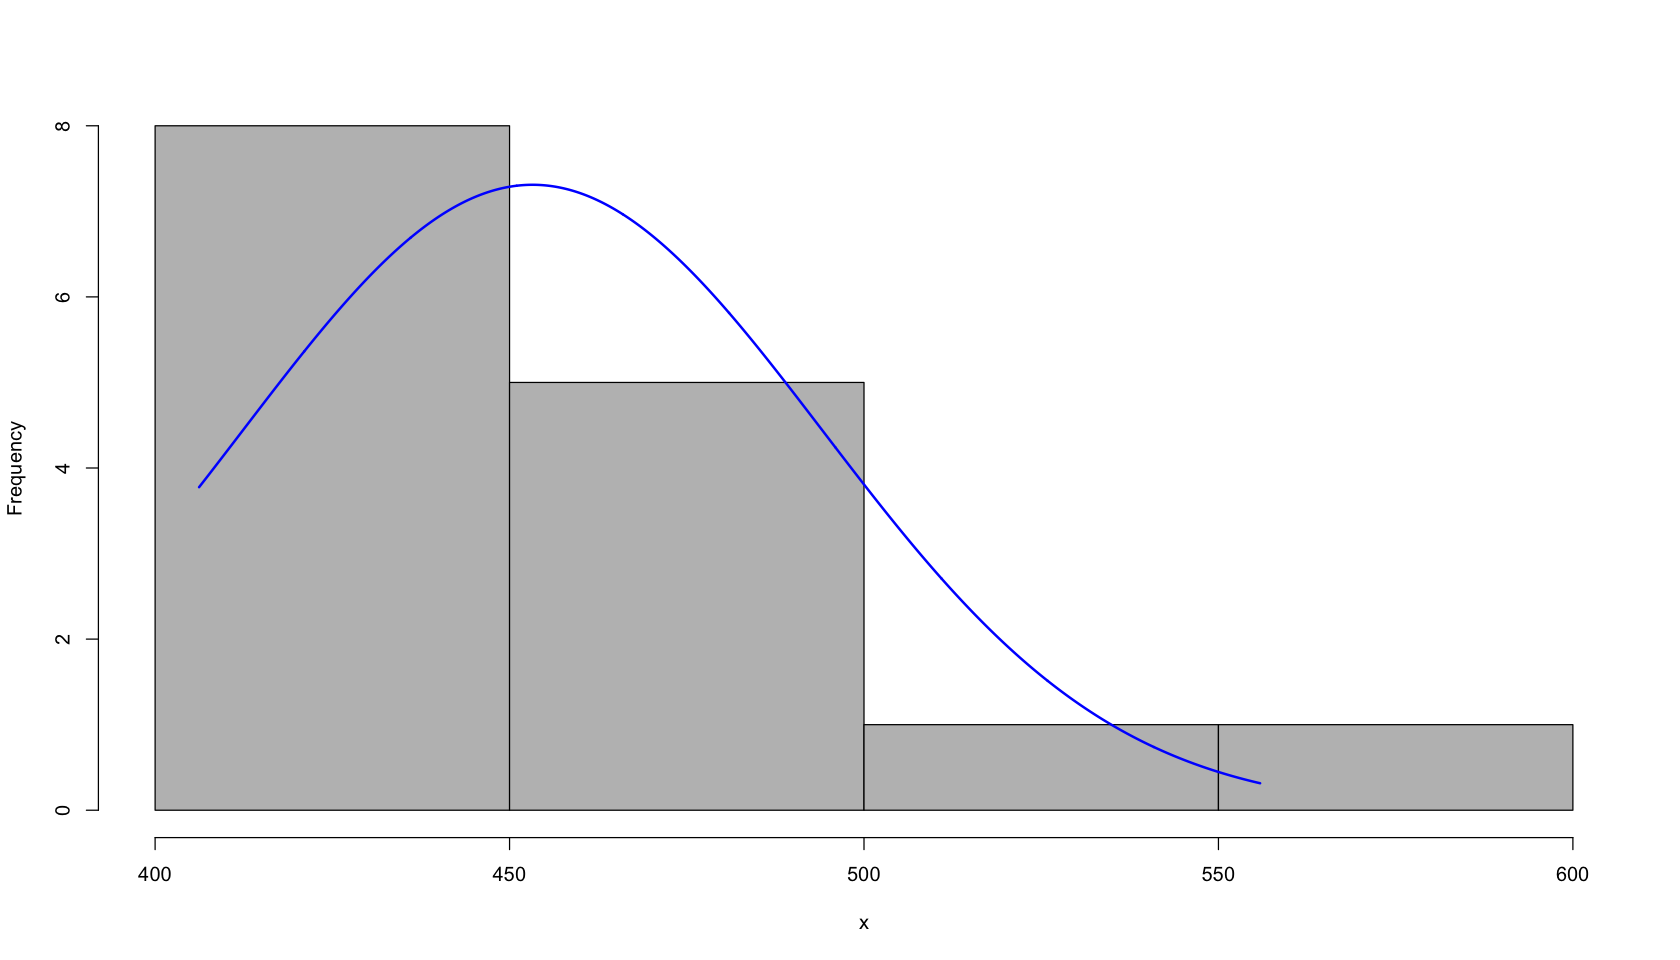

In [219]:
# Try Log since it's still positively skewed and plot it 

USDA_Rye$ValueLOG <- log(USDA_Rye$Value)

plotNormalHistogram(USDA_Rye$ValueSQRT)



In [220]:
# Since its not working yet, let's try - Tukey's Ladder of Power Transformation

USDA_Rye$ValueTUK <- transformTukey(USDA_Rye$Value, plotit=FALSE)



    lambda      W Shapiro.p.value
263  -3.45 0.9682          0.8299

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



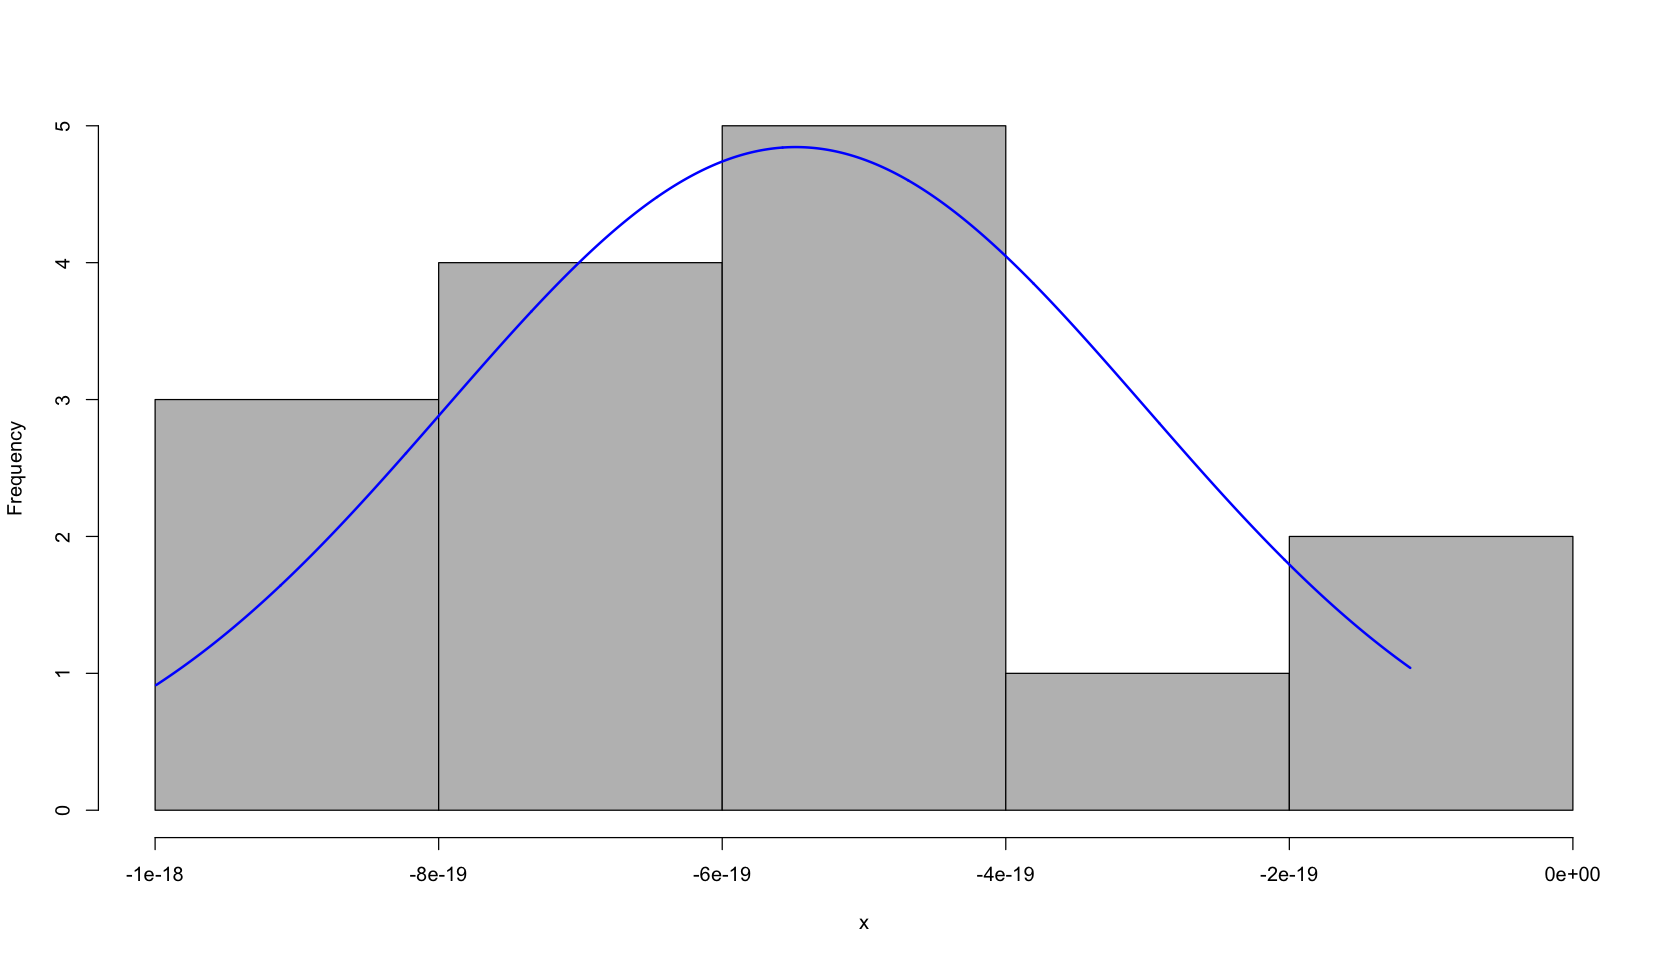

In [221]:
# Plot

plotNormalHistogram(USDA_Rye$ValueTUK)


In [222]:
# Ta da - it worked. So we'll keep production value as ValueTUK

`geom_smooth()` using formula 'y ~ x'



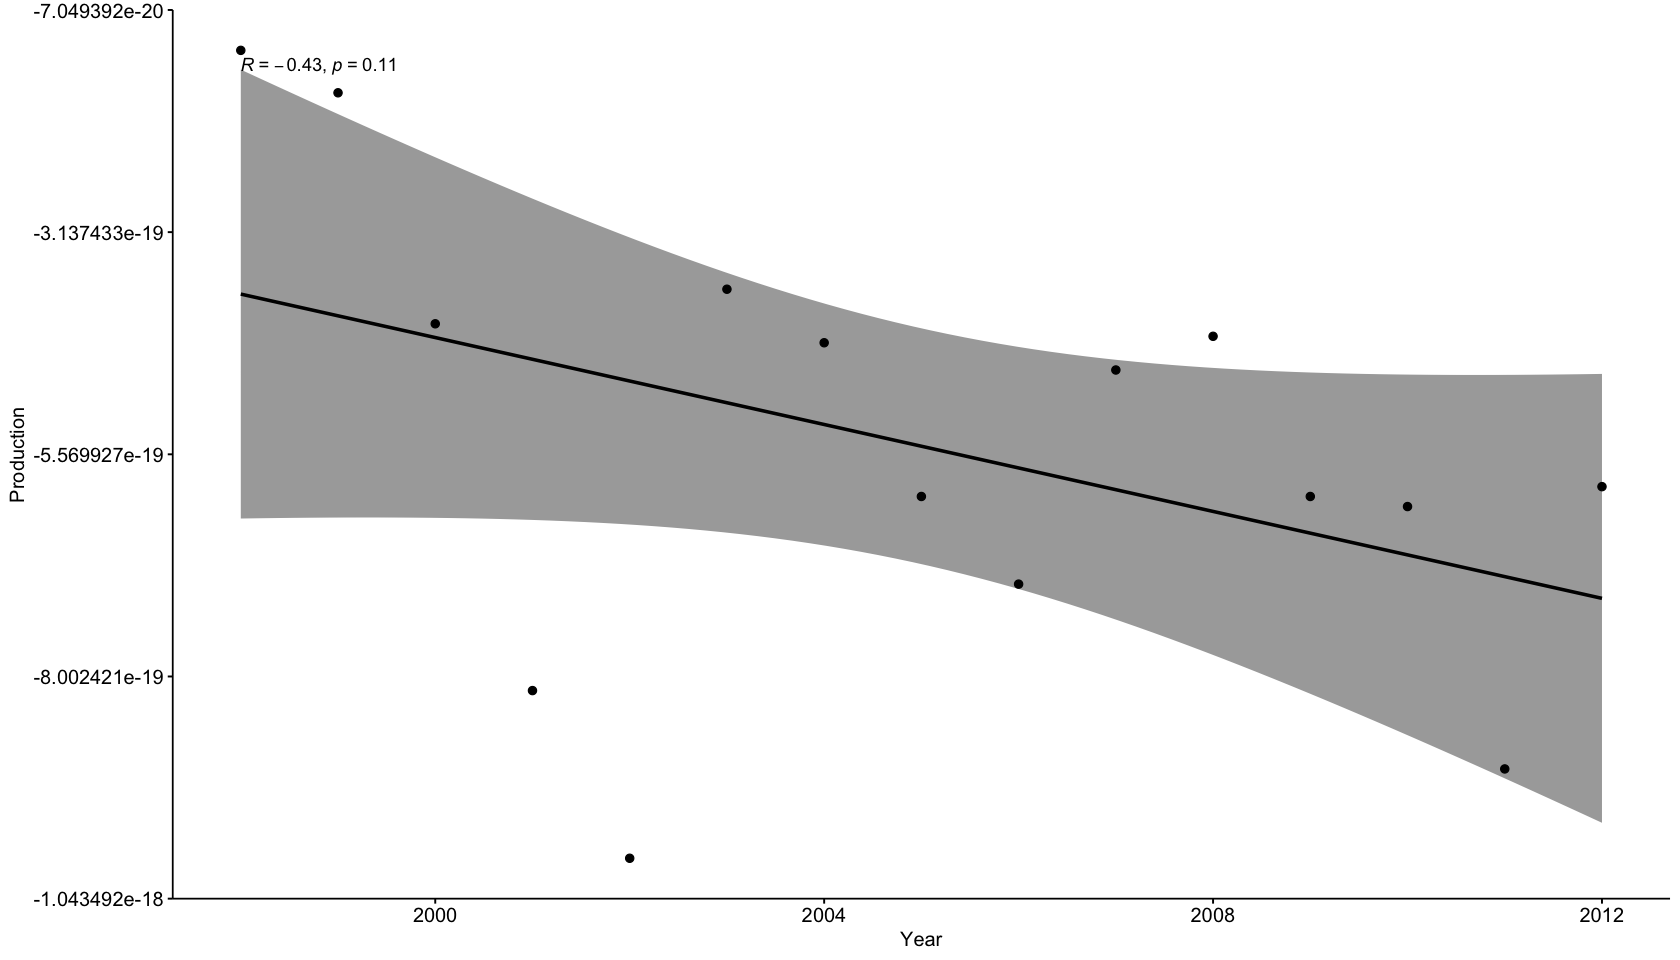

In [223]:
# Let's see scatter plot as well 

ggscatter(USDA_Rye, x = "Year", y = "ValueTUK", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Year", ylab = "Production")

In [224]:
## Looking at Pearson's correlation

cor.test(USDA_Rye$Year, USDA_Rye$ValueTUK, method="pearson", use = "complete.obs")


	Pearson's product-moment correlation

data:  USDA_Rye$Year and USDA_Rye$ValueTUK
t = -1.7209, df = 13, p-value = 0.109
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.7725381  0.1046092
sample estimates:
       cor 
-0.4307356 


In [225]:
### We see here there is not a significant correlation between Rye production and time from 1998 - 2012. 
### At 77% we can be fairly confident of this correlation!

# The p-value of the test is 0.109, which is greater than the significance level alpha = 0.05.
# We can conclude that Rye production and Year are not very significantly correlated to each other.

### Running linear regression model




In [226]:
## Running linear regression model

Rye_LM <- lm(ValueTUK ~ Year, USDA_Rye)
print(Rye_LM)


Call:
lm(formula = ValueTUK ~ Year, data = USDA_Rye)

Coefficients:
(Intercept)         Year  
  4.716e-17   -2.380e-20  



In [227]:
summary(Rye_LM)


Call:
lm(formula = ValueTUK ~ Year, data = USDA_Rye)

Residuals:
       Min         1Q     Median         3Q        Max 
-5.225e-19 -9.111e-20  5.292e-20  1.277e-19  2.668e-19 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  4.716e-17  2.772e-17   1.701    0.113
Year        -2.380e-20  1.383e-20  -1.721    0.109

Residual standard error: 2.314e-19 on 13 degrees of freedom
Multiple R-squared:  0.1855,	Adjusted R-squared:  0.1229 
F-statistic: 2.961 on 1 and 13 DF,  p-value: 0.109


In [228]:
# We can see here there's no correlation between time and Rye.

### 2 - What is the equation of the linear relationship between Rye and Honey from 1998-2012?


`geom_smooth()` using formula 'y ~ x'



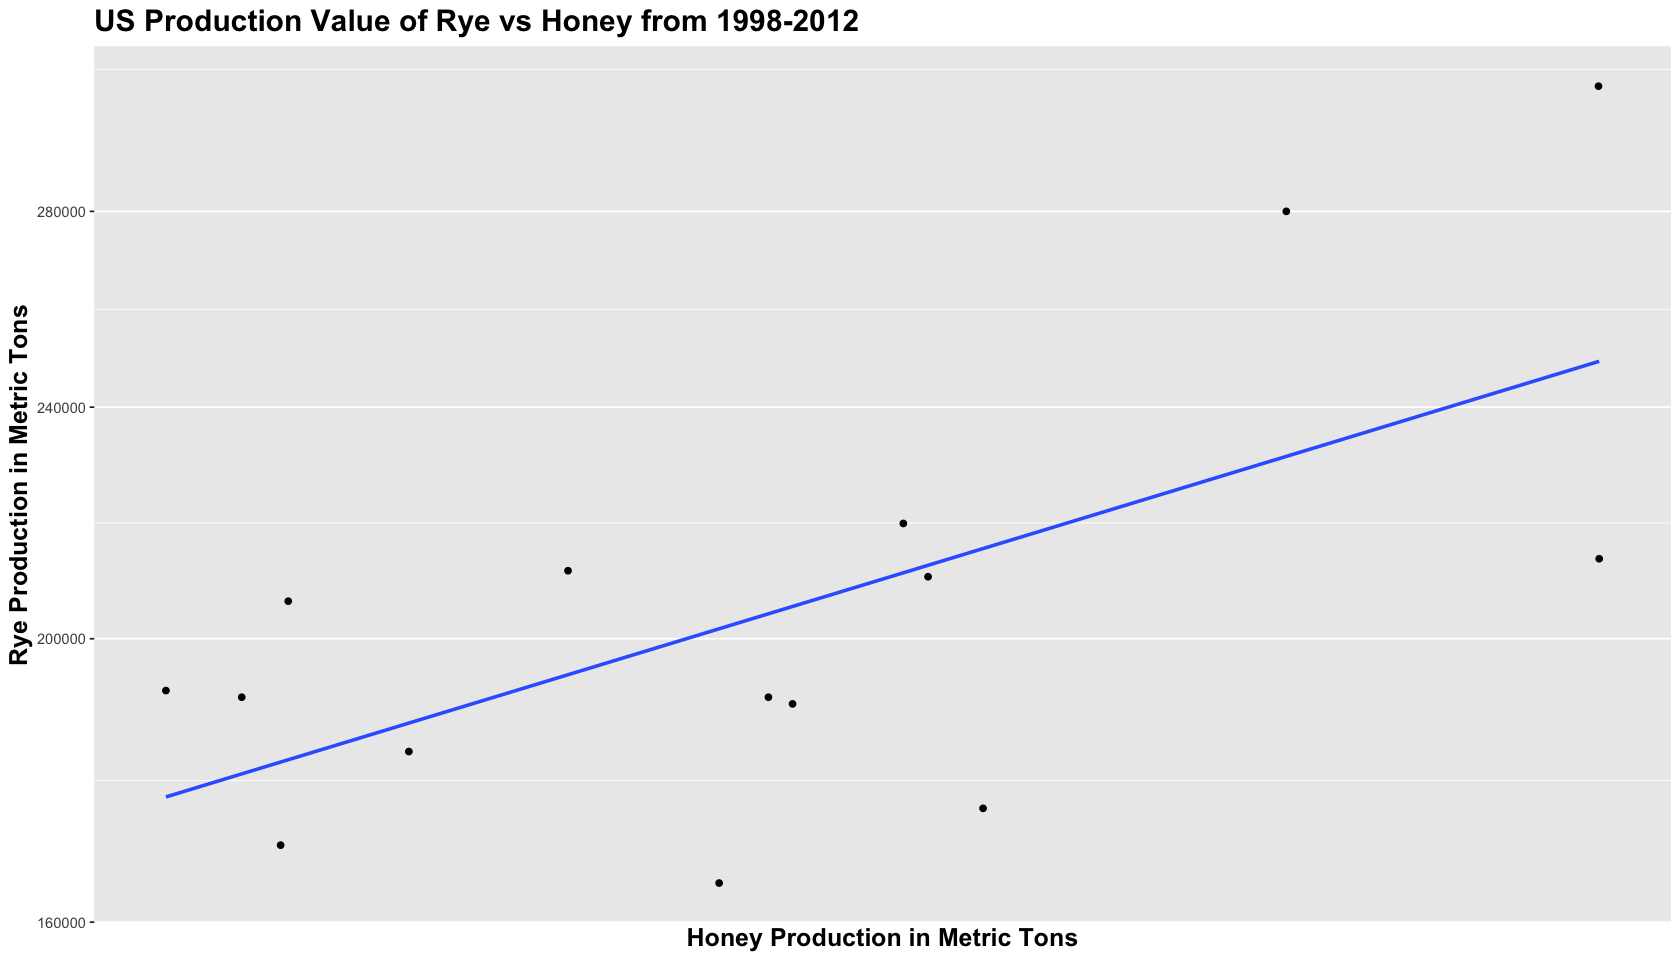

In [229]:
# Creating a scatterplot with best line fit

ggplot(FinalDSYear98to12, aes(x = HoneyValue, y = RyeValue))+ 
                geom_point() + geom_smooth(method=lm, se=FALSE)+
                ggtitle('US Production Value of Rye vs Honey from 1998-2012')+
                xlab('Honey Production in Metric Tons')+
                ylab('Rye Production in Metric Tons')+
                theme(title = element_text(size= 15, face="bold"))+
                scale_x_continuous(breaks = 1998:2012)+
                scale_y_log10()

In [230]:
# We can see a direct positive correlation, matching the data we found in our correlation matrix.

`geom_smooth()` using formula 'y ~ x'



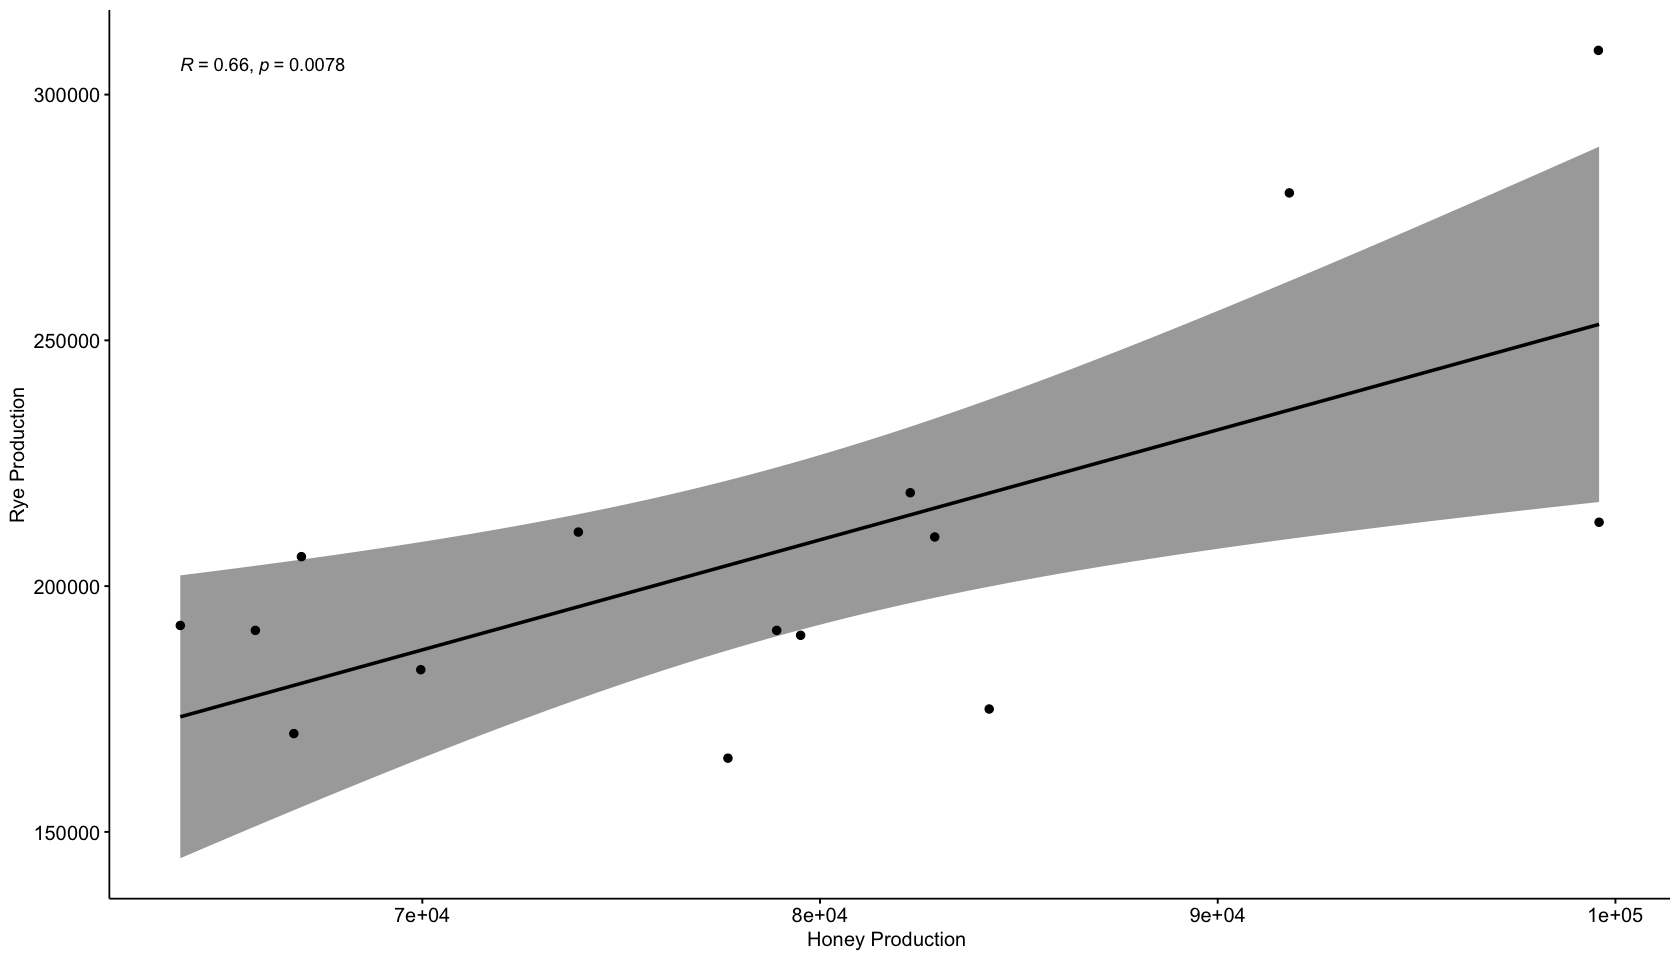

In [231]:
# Scatter Plot

ggscatter(FinalDSYear98to12, x = "HoneyValue", y = "RyeValue", 
          add = "reg.line", conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",
          xlab = "Honey Production ", ylab = "Rye Production")

In [232]:
## Running Pearson's correlation

cor.test(FinalDSYear98to12$HoneyValue, USDA_Rye$ValueTUK, method="pearson", use = "complete.obs")


	Pearson's product-moment correlation

data:  FinalDSYear98to12$HoneyValue and USDA_Rye$ValueTUK
t = 5.3406, df = 13, p-value = 0.0001341
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.550087 0.941386
sample estimates:
      cor 
0.8288024 


In [233]:
### We see here there is a significant correlation between Rye production and Honey Production from 1998 - 2012. 
### At 94% we can be fairly confident of this correlation!

# The p-value of the test is 0.0001, which is less than the significance level alpha = 0.05.
# We can conclude that Rye production and Honey production are significantly correlated with a 
# correlation coefficient of .82 and p-value of .0001 .

In [234]:
## Running linear regression model

RyeHoney_LM <- lm(RyeValue ~ HoneyValue, FinalDSYear98to12)
print(RyeHoney_LM)


Call:
lm(formula = RyeValue ~ HoneyValue, data = FinalDSYear98to12)

Coefficients:
(Intercept)   HoneyValue  
  30357.011        2.238  



In [235]:
# The equation we get here is : y = 2.238(honey) + 30357.011

In [236]:
summary(RyeHoney_LM)


Call:
lm(formula = RyeValue ~ HoneyValue, data = FinalDSYear98to12)

Residuals:
   Min     1Q Median     3Q    Max 
-43937 -17151  -3947  16887  55777 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 3.036e+04  5.676e+04   0.535  0.60181   
HoneyValue  2.238e+00  7.121e-01   3.143  0.00778 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30800 on 13 degrees of freedom
Multiple R-squared:  0.4318,	Adjusted R-squared:  0.3881 
F-statistic: 9.878 on 1 and 13 DF,  p-value: 0.007776


In [237]:
### We can see here that there is a significant influence of Honey on Rye production;
# after looking at adjusted R-squared we see that Honey accounts for 40% of production value of Rye. 

## Graphing the highly correlated commodities - Oats , Barley , Rye and Honey.

In [238]:
# Filtering and Looking at production for each - Barley, Oats, Rye and Honey

USDA_BarleyOatsRyeHoney <- Grouped_Honey_DS3 %>%
  filter(Commodity_Description == "Barley" | Commodity_Description == "Oats" | Commodity_Description == "Rye" | Commodity_Description == "Honey") %>%
  arrange(desc(Value))

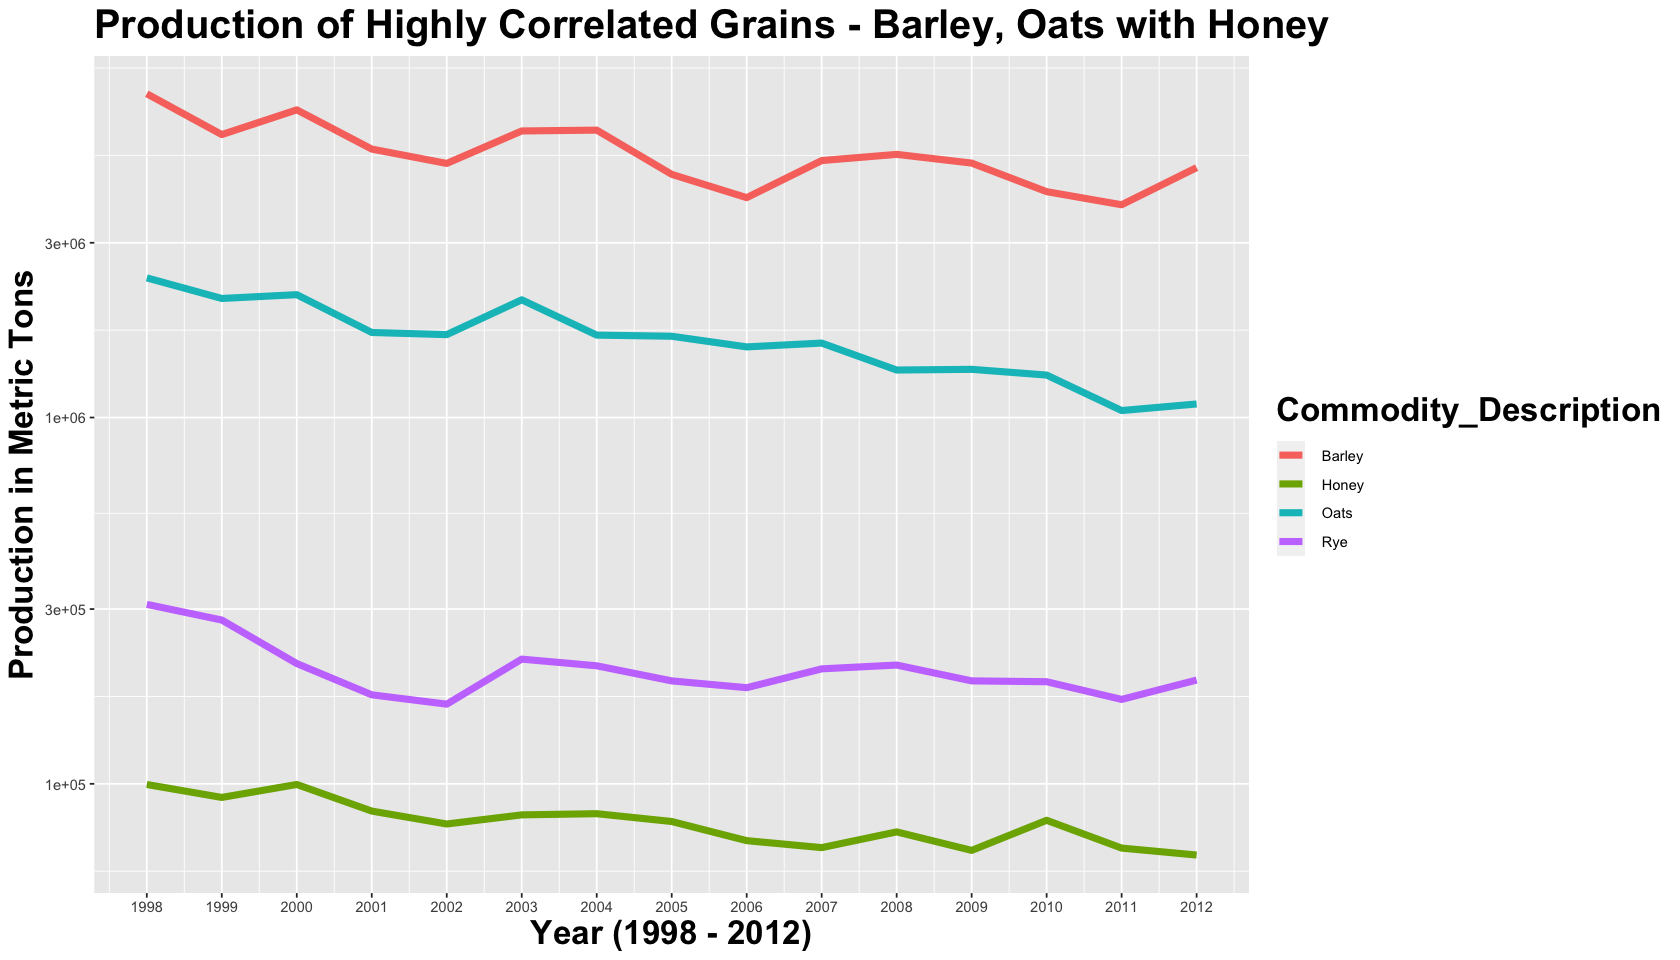

In [239]:
# Line plot for Barley Honey Oats Rye over the years.

ggplot(USDA_BarleyOatsRyeHoney) + 
  geom_line(aes(x = Year, y = Value, color = Commodity_Description), lwd = 2) +
  scale_x_continuous(breaks = 1998:2012) +
  scale_y_log10()+
  labs(x = "Year (1998 - 2012)", y = "Production in Metric Tons", title = "Production of Highly Correlated Grains - Barley, Oats with Honey") +
  theme(title = element_text(size= 20, face="bold"))
